In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/H4TF 4 CON CÚ/Business Case 2/Data/100000 Sales Records.csv')
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


In [4]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%m/%d/%Y')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format='%m/%d/%Y')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Region          100000 non-null  object        
 1   Country         100000 non-null  object        
 2   Item Type       100000 non-null  object        
 3   Sales Channel   100000 non-null  object        
 4   Order Priority  100000 non-null  object        
 5   Order Date      100000 non-null  datetime64[ns]
 6   Order ID        100000 non-null  int64         
 7   Ship Date       100000 non-null  datetime64[ns]
 8   Units Sold      100000 non-null  int64         
 9   Unit Price      100000 non-null  float64       
 10  Unit Cost       100000 non-null  float64       
 11  Total Revenue   100000 non-null  float64       
 12  Total Cost      100000 non-null  float64       
 13  Total Profit    100000 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int

#Distribution of Numerical features

In [6]:
data.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100000,1.000000e+05,100000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05
mean,2013-10-15 06:03:35.136000256,5.503956e+08,2013-11-09 06:55:19.488000,5001.446170,266.703989,188.019711,1.336067e+06,9.419755e+05,3.940912e+05
min,2010-01-01 00:00:00,1.000089e+08,2010-01-02 00:00:00,1.000000,9.330000,6.920000,1.866000e+01,1.384000e+01,4.820000e+00
25%,2011-11-25 00:00:00,3.260464e+08,2011-12-21 00:00:00,2505.000000,109.280000,56.670000,2.797533e+05,1.629283e+05,9.590000e+04
50%,2013-10-15 00:00:00,5.477185e+08,2013-11-09 00:00:00,5007.000000,205.700000,117.110000,7.898916e+05,4.679374e+05,2.836575e+05
75%,2015-09-07 00:00:00,7.750785e+08,2015-10-02 00:00:00,7495.250000,437.200000,364.690000,1.836490e+06,1.209475e+06,5.683841e+05
max,2017-07-28 00:00:00,9.999965e+08,2017-09-16 00:00:00,10000.000000,668.270000,524.960000,6.682700e+06,5.249075e+06,1.738700e+06
std,NaN,2.593219e+08,NaN,2884.575424,216.940081,175.706023,1.471768e+06,1.151828e+06,3.795986e+05


# Distribution of Categorical features

In [7]:
data.describe(include=[object])

,Region,Country,Item Type,Sales Channel,Order Priority
count,100000,100000,100000,100000,100000
unique,7,185,12,2,4
top,Sub-Saharan Africa,Sudan,Office Supplies,Online,M
freq,26019,623,8426,50054,25088


# Checking missing values

In [8]:
missing_values = data.isnull().sum()
print(missing_values)

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


# Checking Outliers

In [9]:
def plot_boxplots(df):
    numerical_cols = df.select_dtypes(include=['number']).columns
    n = len(numerical_cols)
    fig, axes = plt.subplots(nrows=(n + 1) // 2, ncols=2, figsize=(15, 5 * ((n + 1) // 2)))

    for i, col in enumerate(numerical_cols):
        ax = axes[i // 2, i % 2]
        box = ax.boxplot(df[col], vert=True, patch_artist=True)
        for patch in box['boxes']:
            patch.set_facecolor('#ADD8E6')
        ax.set_title(f'{col}')
        ax.set_ylabel(col)
        ax.set_xlabel('')

    for j in range(n, 2 * ((n + 1) // 2)):
        fig.delaxes(axes[j // 2, j % 2])

    plt.tight_layout()
    plt.show()

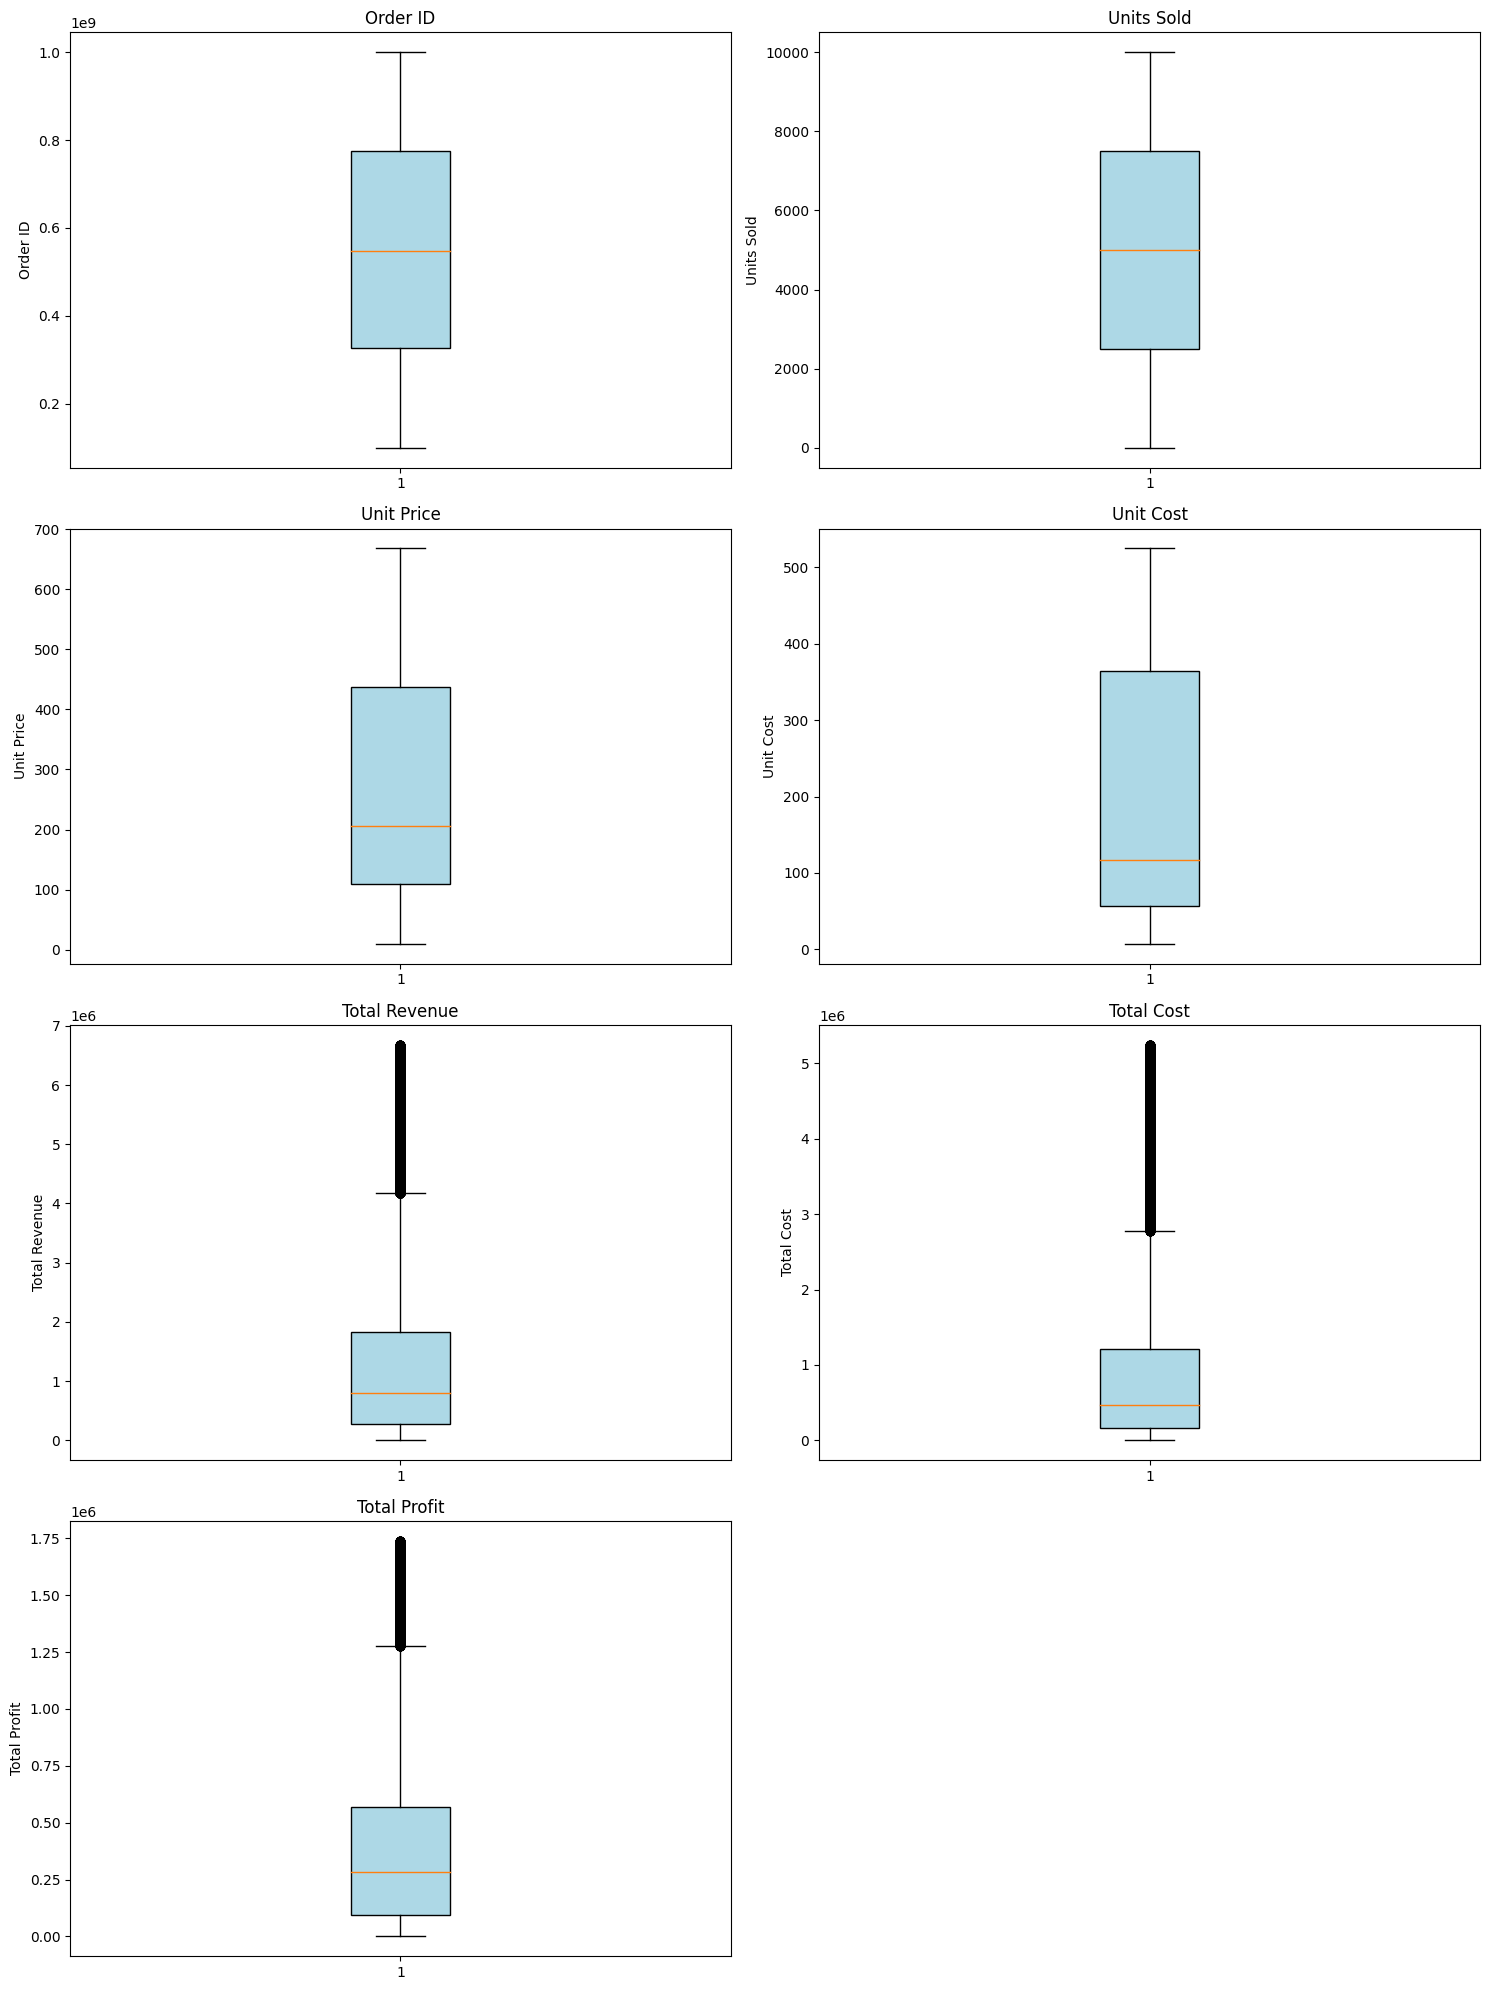

In [10]:
plot_boxplots(data)

# Check duplicate

In [11]:
duplicates = data.duplicated()
print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  0


In [12]:
duplicates = data['Order ID'].duplicated()
print("Number of duplicate rows: ", duplicates.sum())

Number of duplicate rows:  0


# Distribution of features

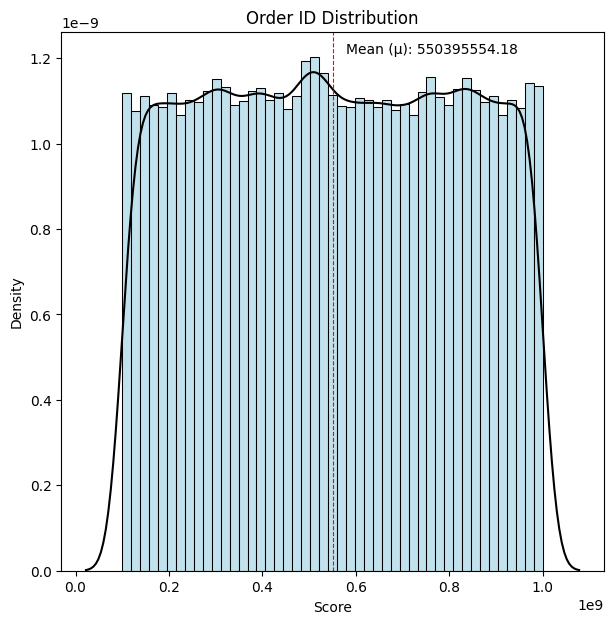

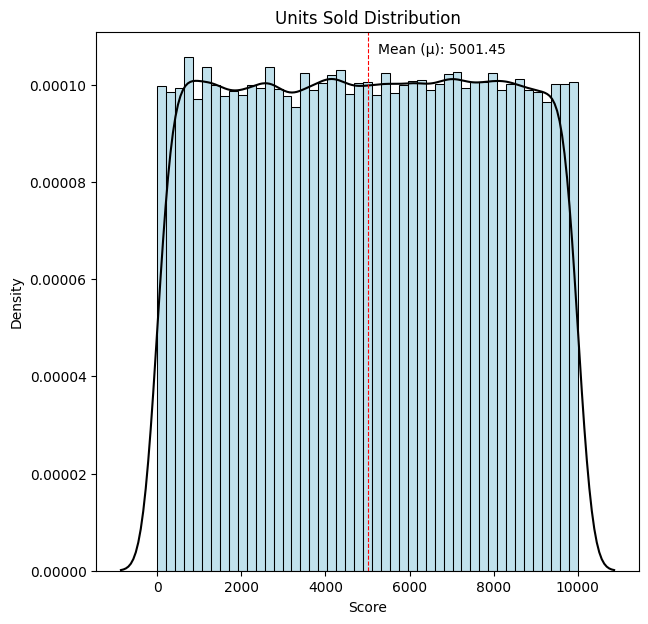

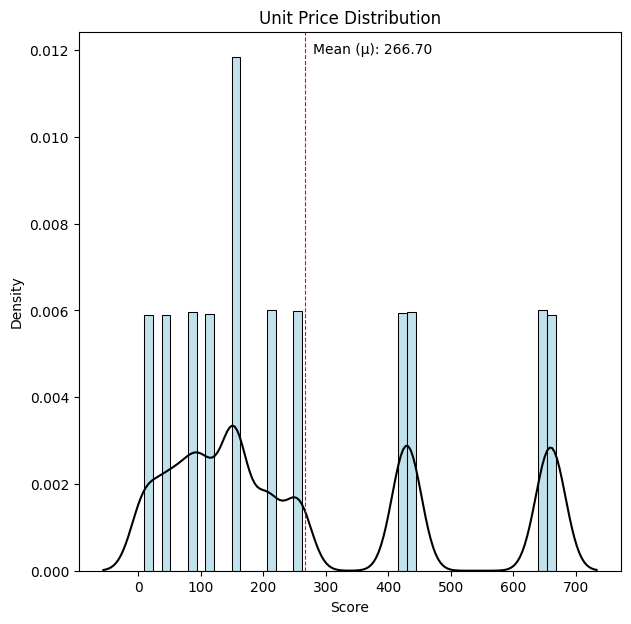

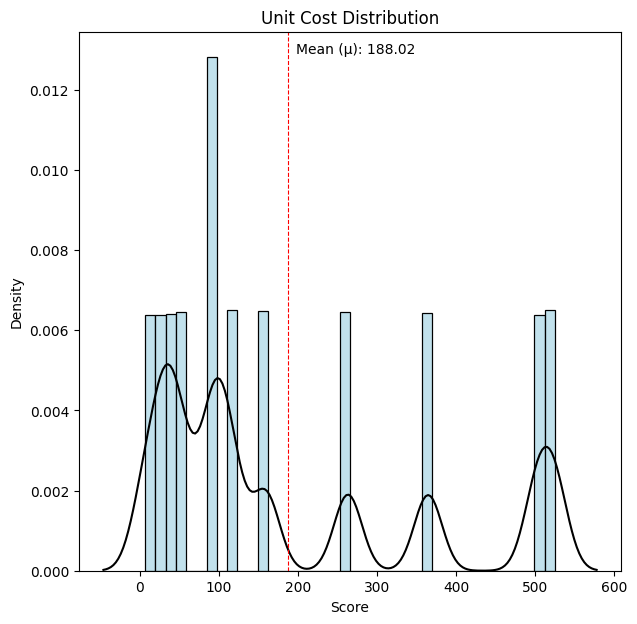

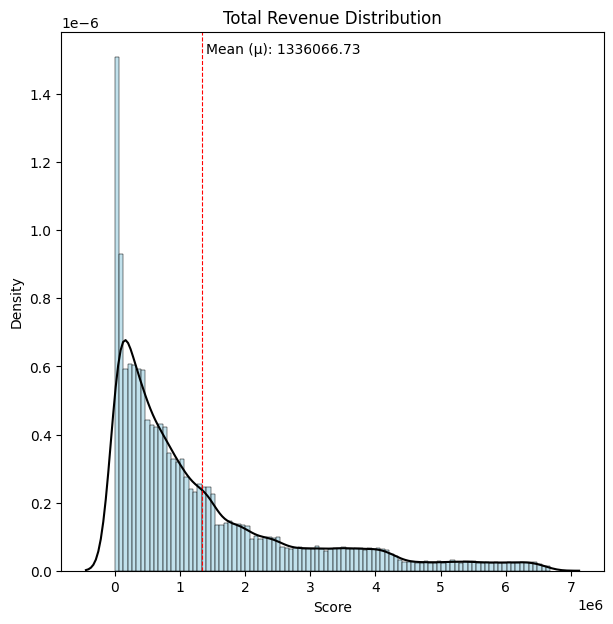

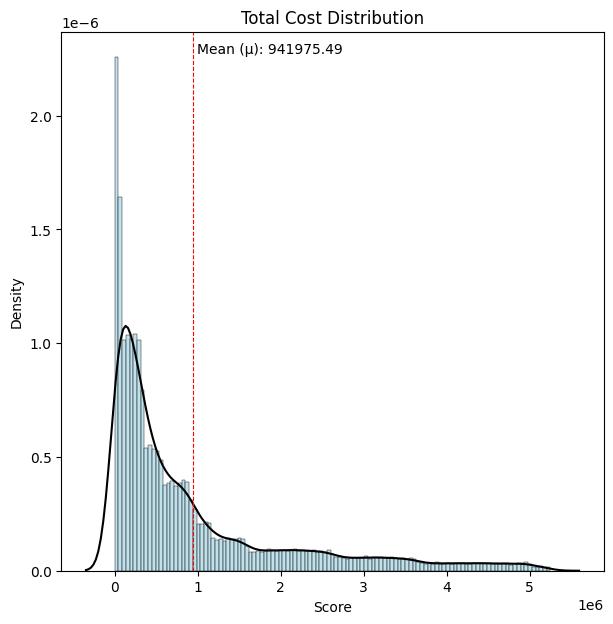

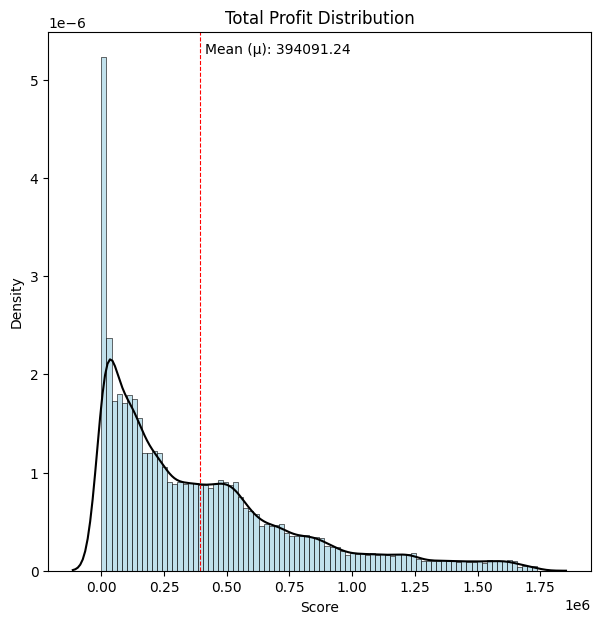

In [13]:
def plot_num_distribution(df):
    for column_name in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(7, 7))
        plt.title("{column_name} Distribution".format(column_name=column_name))

        sns.histplot(df[column_name], stat='density', color='#ADD8E6')

        sns.kdeplot(df[column_name], color='black')

        plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)

        min_ylim, max_ylim = plt.ylim()
        plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))

        plt.xlabel("Score")
        plt.ylabel("Density")

        plt.show()

plot_num_distribution(data)

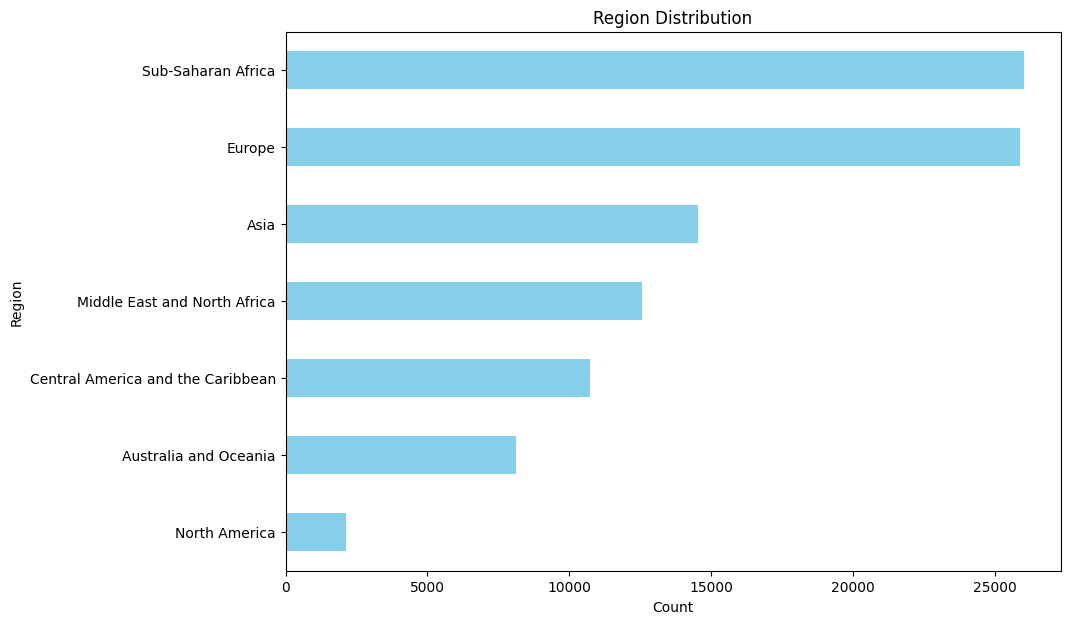

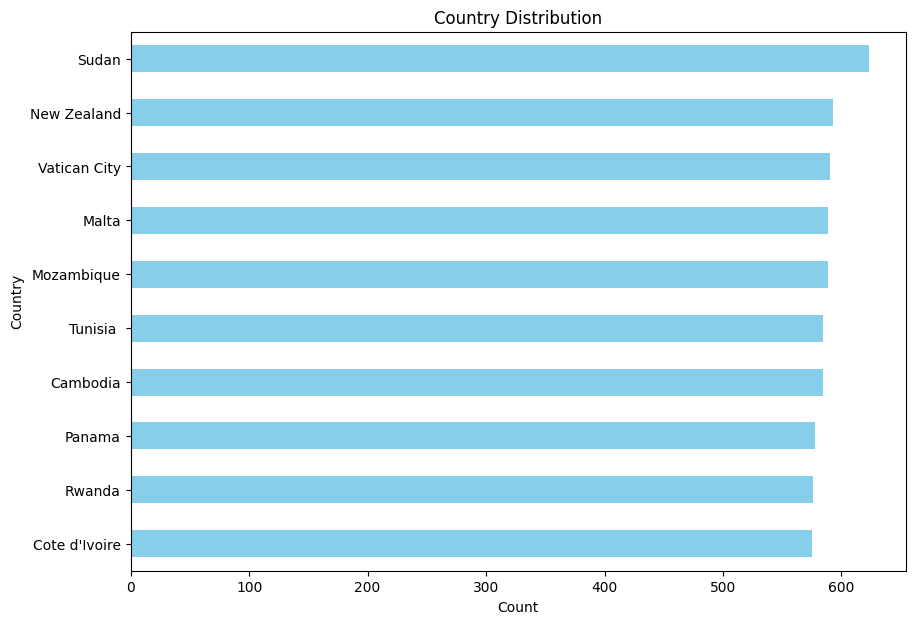

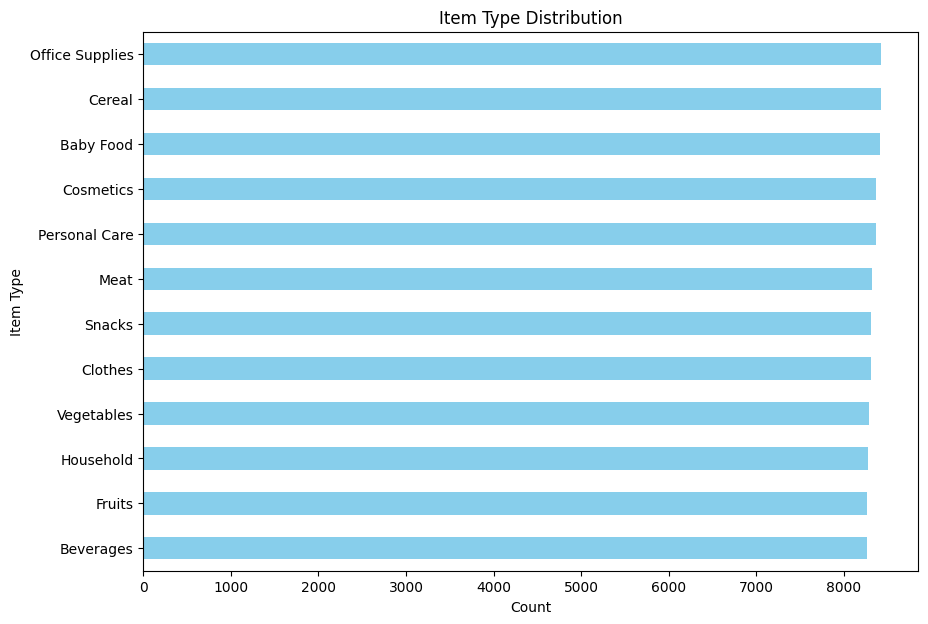

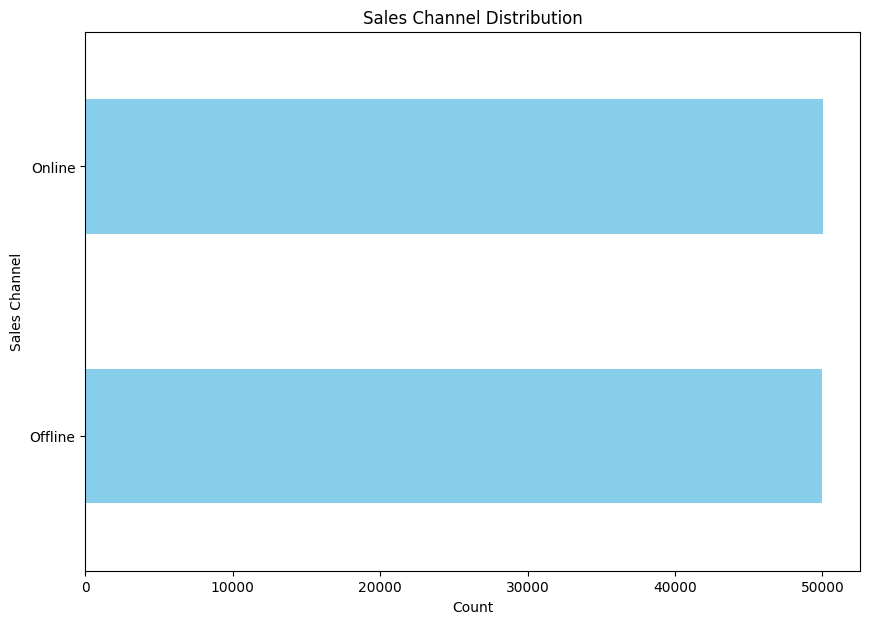

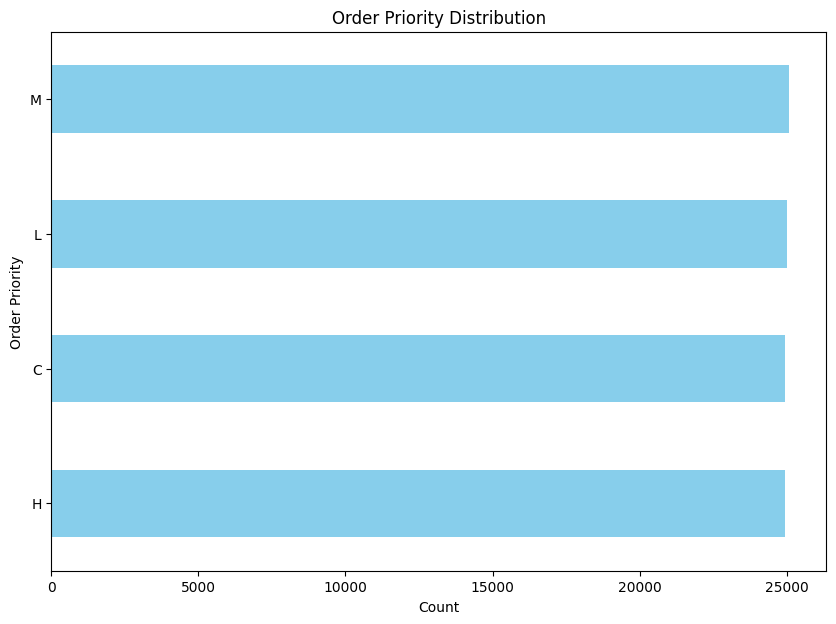

In [14]:
def plot_bar_charts(df):
    object_cols = df.select_dtypes(include=['object']).columns

    for column_name in object_cols:
        plt.figure(figsize=(10, 7))
        value_counts = df[column_name].value_counts().sort_values(ascending=True)

        if len(value_counts) > 20:
            value_counts = value_counts[-10:]

        value_counts.plot(kind='barh', color='skyblue')
        plt.title(f'{column_name} Distribution')
        plt.xlabel('Count')
        plt.ylabel(column_name)
        plt.show()

plot_bar_charts(data)

## **EDA**

# 1. Region and Country

<ipython-input-15-b3dcb358f223>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.values, y=region_revenue.index, palette='viridis')
<ipython-input-15-b3dcb358f223>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_profit.values, y=region_profit.index, palette='viridis')


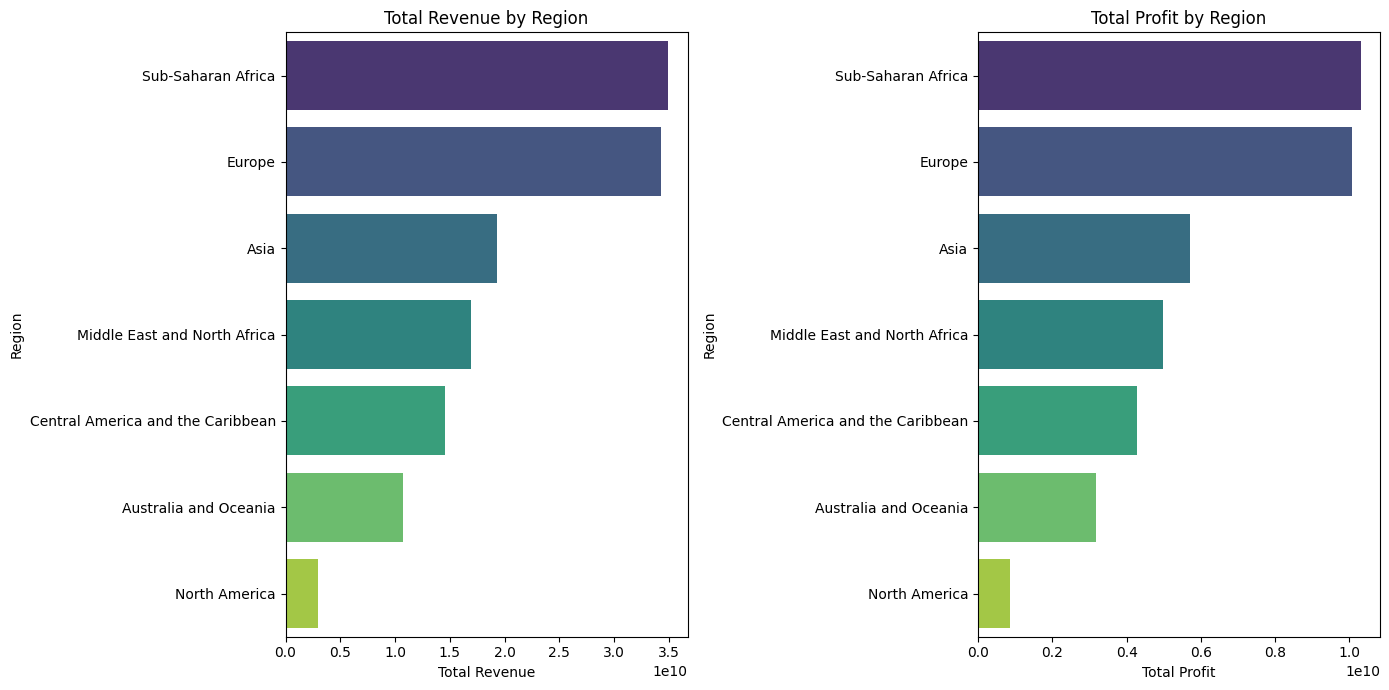

In [15]:
region_revenue = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False)
region_profit = data.groupby('Region')['Total Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=region_revenue.values, y=region_revenue.index, palette='viridis')
plt.title('Total Revenue by Region')
plt.xlabel('Total Revenue')
plt.ylabel('Region')

plt.subplot(1, 2, 2)
sns.barplot(x=region_profit.values, y=region_profit.index, palette='viridis')
plt.title('Total Profit by Region')
plt.xlabel('Total Profit')
plt.ylabel('Region')

plt.tight_layout();


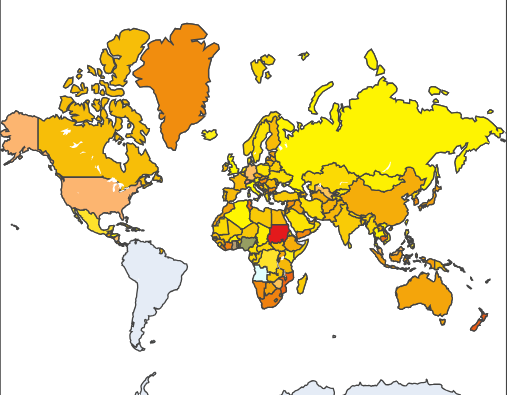

<ipython-input-16-67f040761861>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='viridis')
<ipython-input-16-67f040761861>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_profit.values, y=country_profit.index, palette='viridis')


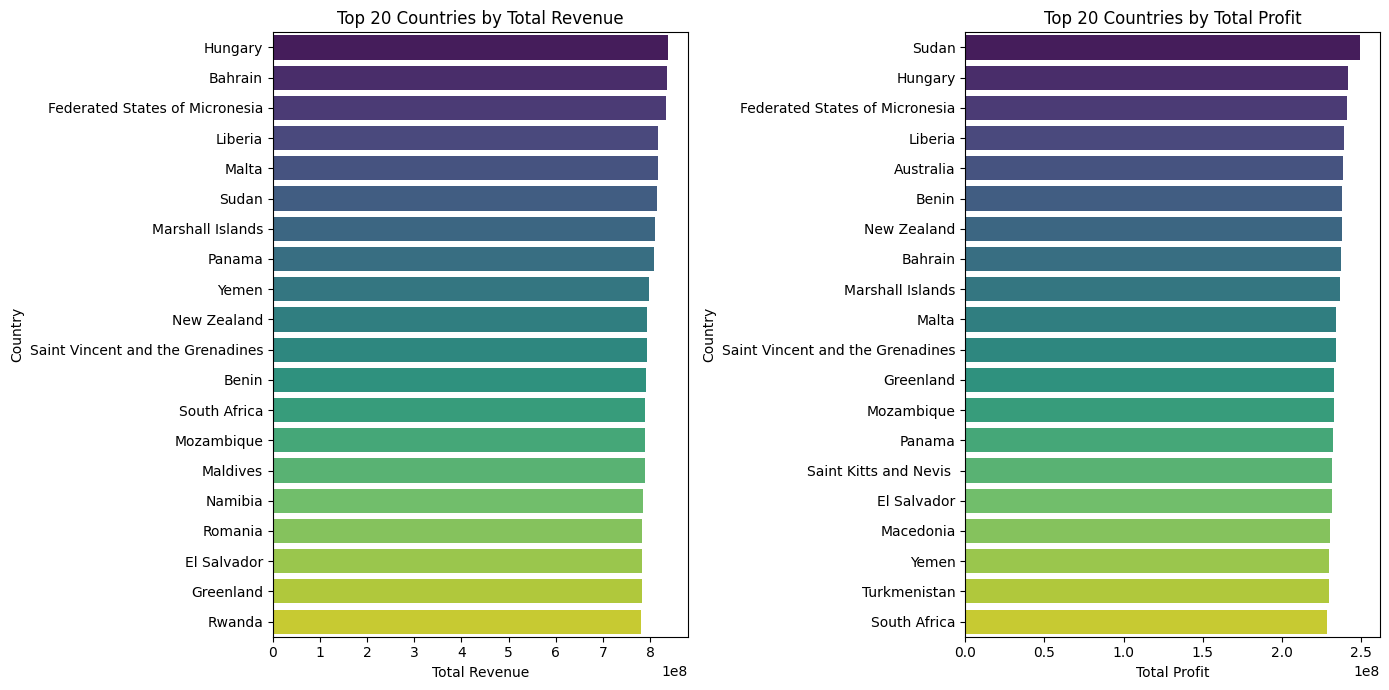

In [16]:
country_revenue = data.groupby('Country')['Total Revenue'].sum().sort_values(ascending=False).head(20)
country_profit = data.groupby('Country')['Total Profit'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='viridis')
plt.title('Top 20 Countries by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(x=country_profit.values, y=country_profit.index, palette='viridis')
plt.title('Top 20 Countries by Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Country')

plt.tight_layout()
plt.show()


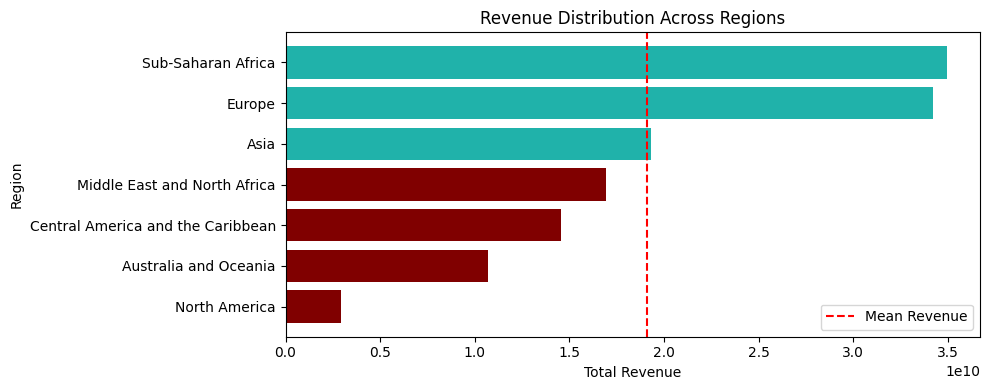

In [17]:
def plot_total_revenue_accross(df):
    # Group the data by region and calculate the total revenue for each region
    revenue_by_region = df.groupby('Region')['Total Revenue'].sum().reset_index()

    # Sort the data by total revenue in ascending order
    revenue_by_region = revenue_by_region.sort_values(by='Total Revenue')

    # Calculate the mean total revenue across all regions
    mean_revenue = revenue_by_region['Total Revenue'].mean()

    # Create a horizontal bar plot of the revenue distribution, highlighting the bars above the mean
    plt.figure(figsize=(10, 4))
    for i, row in revenue_by_region.iterrows():
        if row['Total Revenue'] > mean_revenue:
            color = 'lightseagreen'  # Use a different color for bars above the mean
        else:
            color = 'maroon'  # Use a default color for bars below the mean
        plt.barh(row['Region'], row['Total Revenue'], color=color)

    plt.title('Revenue Distribution Across Regions')
    plt.xlabel('Total Revenue')
    plt.ylabel('Region')
    plt.axvline(x=mean_revenue, color='r', linestyle='--', label='Mean Revenue')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_total_revenue_accross(data)

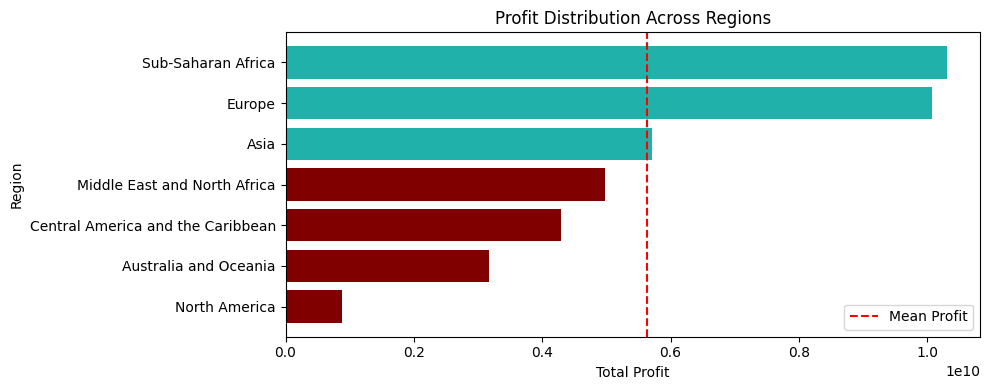

In [18]:
def plot_total_profit_accross(df):
    # Group the data by region and calculate the total profit for each region
    profit_by_region = df.groupby('Region')['Total Profit'].sum().reset_index()

    # Sort the data by total profit in ascending order
    profit_by_region = profit_by_region.sort_values(by='Total Profit')

    # Calculate the mean total profit across all regions
    mean_profit = profit_by_region['Total Profit'].mean()

    # Create a horizontal bar plot of the profit distribution, highlighting the bars above the mean
    plt.figure(figsize=(10, 4))
    for i, row in profit_by_region.iterrows():
        if row['Total Profit'] > mean_profit:
            color = 'lightseagreen'  # Use a different color for bars above the mean
        else:
            color = 'maroon'  # Use a default color for bars below the mean
        plt.barh(row['Region'], row['Total Profit'], color=color)

    plt.title('Profit Distribution Across Regions')
    plt.xlabel('Total Profit')
    plt.ylabel('Region')
    plt.axvline(x=mean_profit, color='r', linestyle='--', label='Mean Profit')
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_total_profit_accross(data)

RFM analysis

In [19]:
# Define a reference date (last date in the dataset)
reference_date = data['Order Date'].max()

# Calculate Recency, Frequency, and Monetary value for each Country
rfm_data = data.groupby(['Region', 'Country']).agg({
    'Order ID': 'nunique',  # Frequency
    'Total Revenue': 'sum',  # Monetary
    'Order Date': lambda x: (reference_date - x.max()).days  # Recency
}).reset_index()

# Rename columns for clarity
rfm_data.columns = ['Region', 'Country', 'Frequency', 'Monetary', 'Recency']

# Assign scores for each metric
rfm_data['R_Score'] = pd.qcut(rfm_data['Recency'], 3, labels=[3, 2, 1])
rfm_data['F_Score'] = pd.qcut(rfm_data['Frequency'], 3, labels=[1, 2, 3])
rfm_data['M_Score'] = pd.qcut(rfm_data['Monetary'], 3, labels=[1, 2, 3])

# Calculate RFM Score
rfm_data['RFM_Score'] = rfm_data['R_Score'].astype(str) + rfm_data['F_Score'].astype(str) + rfm_data['M_Score'].astype(str)

rfm_data

,Region,Country,Frequency,Monetary,Recency,R_Score,F_Score,M_Score,RFM_Score
0,Asia,Bangladesh,545,7.478366e+08,2,3,2,3,323
1,Asia,Bhutan,534,7.406026e+08,1,3,2,2,322
2,Asia,Brunei,558,7.088187e+08,0,3,3,2,332
3,Asia,Cambodia,584,7.547086e+08,4,2,3,3,233
4,Asia,China,554,7.143825e+08,13,1,3,2,132
...,...,...,...,...,...,...,...,...,...
180,Sub-Saharan Africa,The Gambia,513,6.834571e+08,14,1,1,1,111
181,Sub-Saharan Africa,Togo,523,6.918882e+08,0,3,1,1,311
182,Sub-Saharan Africa,Uganda,554,7.478533e+08,2,3,3,3,333
183,Sub-Saharan Africa,Zambia,541,7.218788e+08,3,2,2,2,222


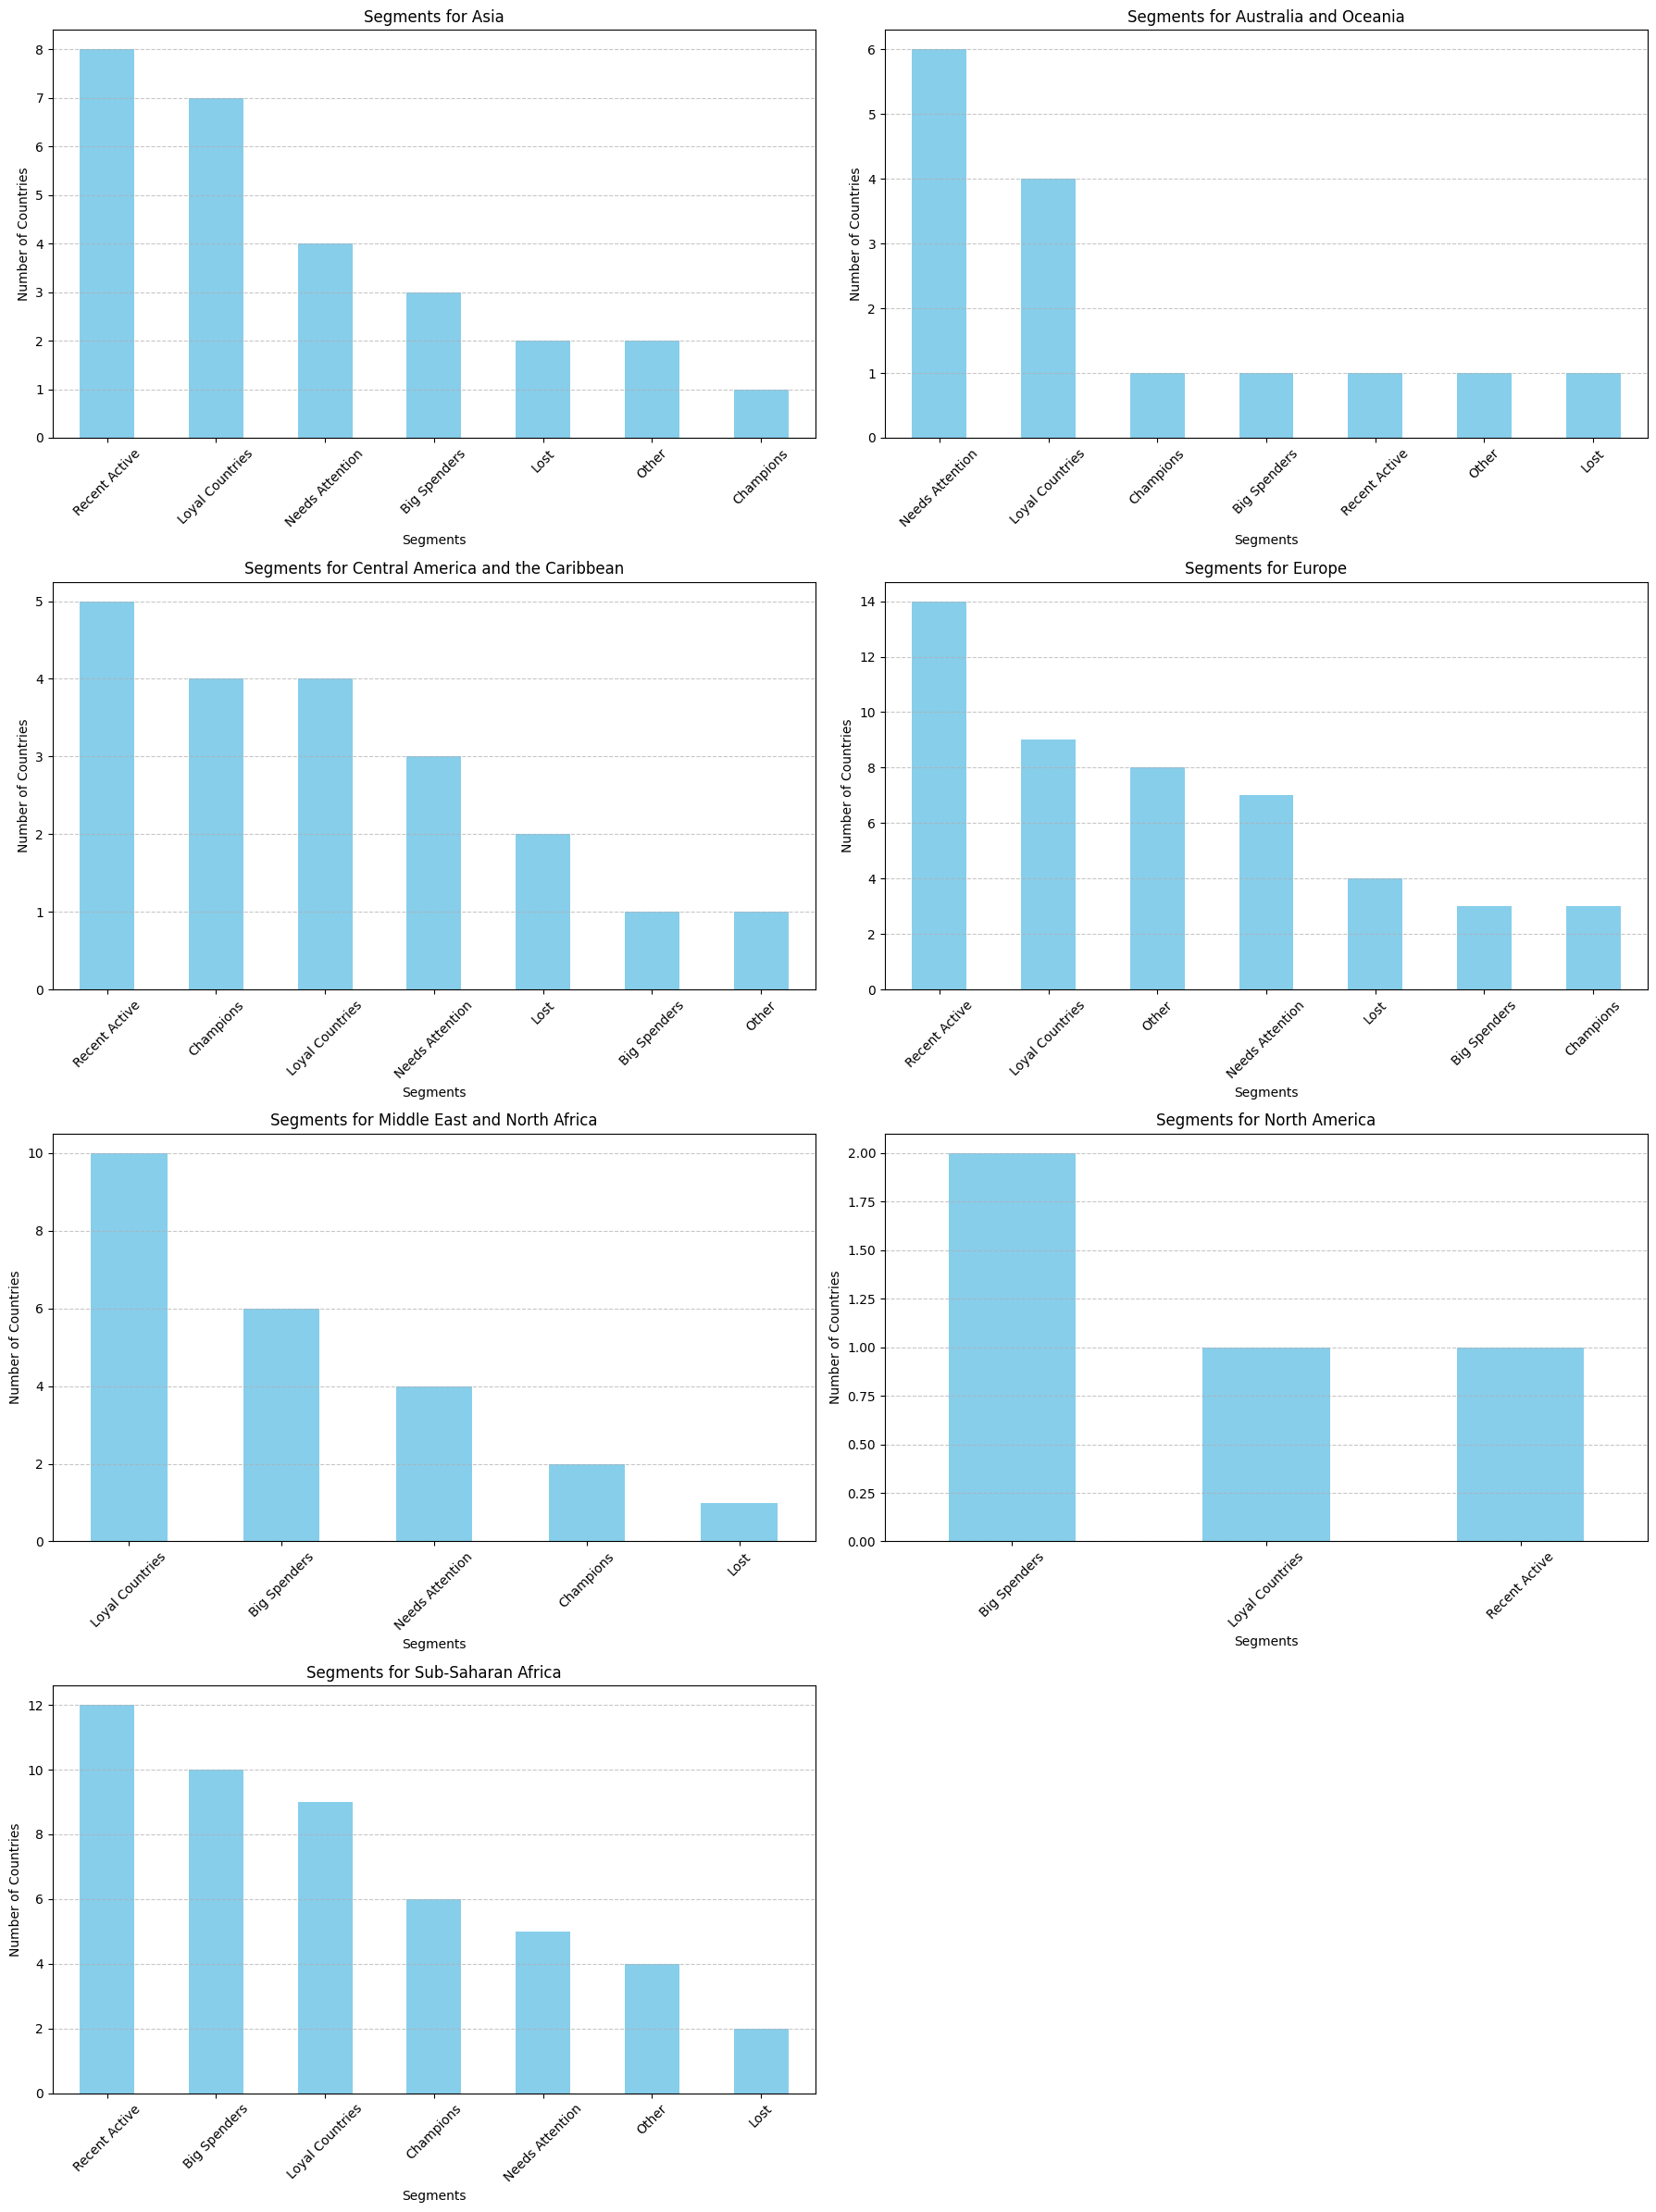

In [20]:
# Define refined segments based on RFM Score for countries
def refined_segment_rfm_country(row):
    if row['RFM_Score'] == '333':
        return 'Champions'
    elif row['F_Score'] == 3:
        return 'Loyal Countries'
    elif row['M_Score'] == 3:
        return 'Big Spenders'
    elif row['R_Score'] == 3:
        return 'Recent Active'
    elif row['R_Score'] == 3 and row['F_Score'] == 3:
        return 'Potential Loyalists'
    elif row['R_Score'] == 3 and row['F_Score'] < 3 and row['M_Score'] < 3:
        return 'Promising'
    elif row['R_Score'] == 2 and (row['F_Score'] < 3 or row['M_Score'] < 3):
        return 'Needs Attention'
    elif row['R_Score'] == 1 and (row['F_Score'] == 3 or row['M_Score'] == 3):
        return 'At Risk'
    elif row['R_Score'] == 1 and row['F_Score'] == 1 and row['M_Score'] == 1:
        return 'Lost'
    else:
        return 'Other'

rfm_data['Segment'] = rfm_data.apply(refined_segment_rfm_country, axis=1)

regions = rfm_data['Region'].unique()
# Plot the refined segments for each region with 2 plots in each axis
num_plots_per_row = 2
num_rows = (len(regions) + 1) // num_plots_per_row

fig, axes = plt.subplots(num_rows, num_plots_per_row, figsize=(18, 6 * num_rows))

for i, region in enumerate(regions):
    row, col = divmod(i, num_plots_per_row)
    region_data = rfm_data[rfm_data['Region'] == region]
    segment_counts = region_data['Segment'].value_counts()

    segment_counts.plot(kind='bar', color='skyblue', ax=axes[row, col])
    axes[row, col].set_title(f'Segments for {region}')
    axes[row, col].set_xlabel('Segments')
    axes[row, col].set_ylabel('Number of Countries')
    axes[row, col].set_xticks(range(len(segment_counts)))
    axes[row, col].set_xticklabels(segment_counts.index, rotation=45)
    axes[row, col].grid(axis='y', linestyle='--', alpha=0.7)

# Remove empty subplots
if len(regions) % num_plots_per_row != 0:
    for j in range(len(regions) % num_plots_per_row, num_plots_per_row):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()


CLV Analysis

In [21]:
# Calculate Total Revenue per customer (Country used as a proxy for customers here)
customer_revenue = data.groupby('Country').agg({
    'Total Revenue': 'sum',
    'Order ID': 'nunique',  # Frequency
    'Order Date': [lambda x: (x.max() - x.min()).days, 'count']
}).reset_index()

customer_revenue.columns = ['Country', 'Total Revenue', 'Frequency', 'Customer Lifespan', 'Num Orders']

# Average Order Value (AOV)
customer_revenue['AOV'] = customer_revenue['Total Revenue'] / customer_revenue['Num Orders']

# Purchase Frequency (PF)
total_orders = customer_revenue['Num Orders'].sum()
total_customers = customer_revenue['Country'].nunique()
customer_revenue['PF'] = customer_revenue['Num Orders'] / total_customers

# Customer Value (CV)
customer_revenue['CV'] = customer_revenue['AOV'] * customer_revenue['PF']

# Average Customer Lifespan (ACL)
customer_revenue['ACL'] = customer_revenue['Customer Lifespan'] / total_customers

# Customer Lifetime Value (CLV)
customer_revenue['CLV'] = customer_revenue['CV'] * customer_revenue['ACL']

# Display the results
customer_revenue[['Country', 'CLV']].sort_values(by='CLV', ascending=False).head(10)


,Country,CLV
10,Bahrain,6.733677e+07
50,Federated States of Micronesia,6.714881e+07
66,Hungary,6.692131e+07
88,Liberia,6.593958e+07
99,Malta,6.577992e+07
155,Sudan,6.572636e+07
100,Marshall Islands,6.508050e+07
124,Panama,6.494082e+07
182,Yemen,6.421136e+07
136,Saint Vincent and the Grenadines,6.393804e+07


# 2. Item Type

<ipython-input-22-1d8c83b99b0a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_type_revenue.values, y=item_type_revenue.index, palette='viridis')
<ipython-input-22-1d8c83b99b0a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=item_type_profit.values, y=item_type_profit.index, palette='viridis')


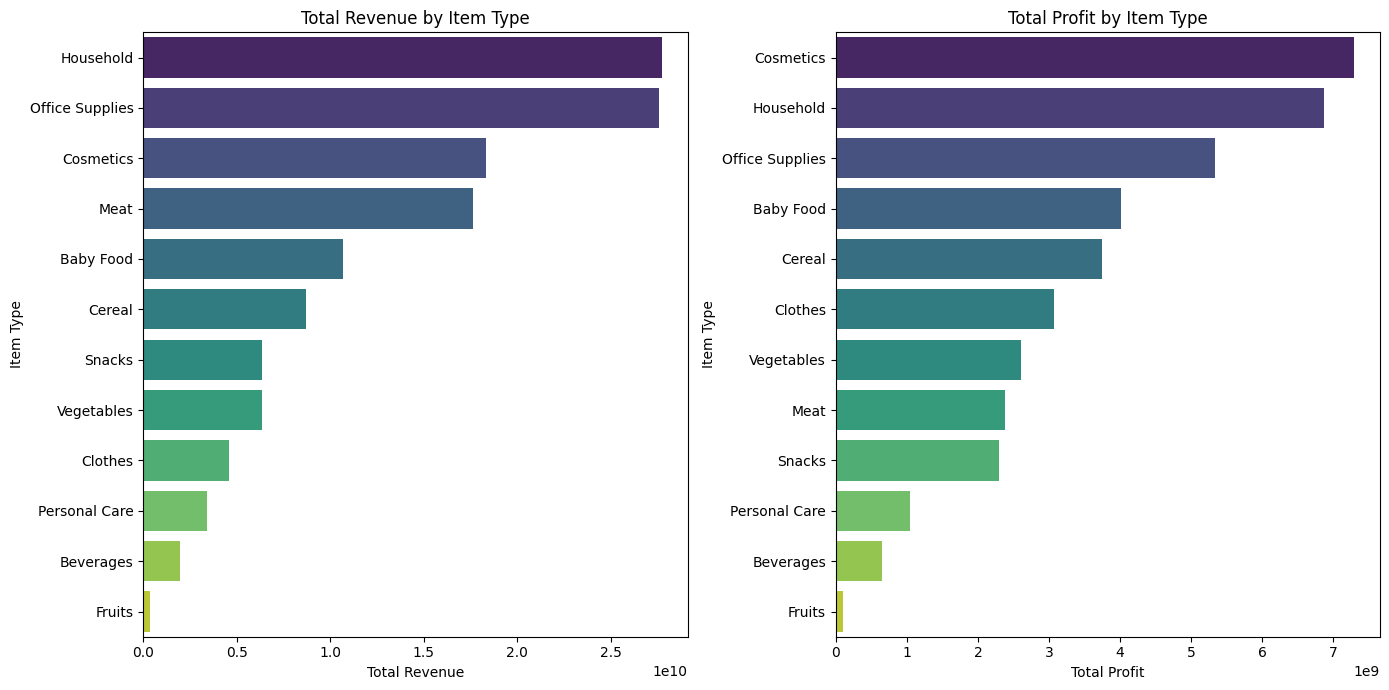

In [22]:
item_type_revenue = data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False)

item_type_profit = data.groupby('Item Type')['Total Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=item_type_revenue.values, y=item_type_revenue.index, palette='viridis')
plt.title('Total Revenue by Item Type')
plt.xlabel('Total Revenue')
plt.ylabel('Item Type')

plt.subplot(1, 2, 2)
sns.barplot(x=item_type_profit.values, y=item_type_profit.index, palette='viridis')
plt.title('Total Profit by Item Type')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')

plt.tight_layout()
plt.show()

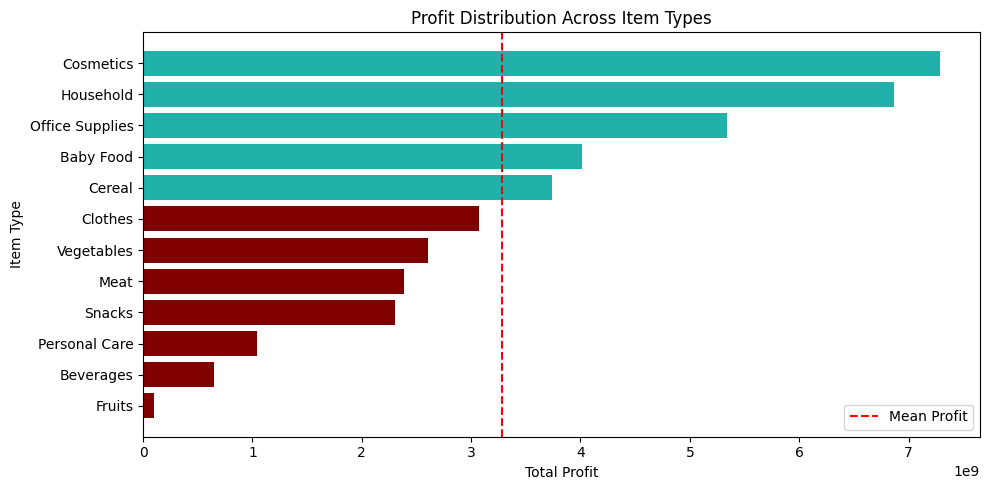

In [23]:
df = data
# Group the data by item type and calculate the total profit for each item type
profit_by_item_type = df.groupby('Item Type')['Total Profit'].sum().reset_index()

# Sort the data by total profit in ascending order
profit_by_item_type = profit_by_item_type.sort_values(by='Total Profit')

# Calculate the mean total profit across all item types
mean_profit = profit_by_item_type['Total Profit'].mean()

# Create a horizontal bar plot of the profit distribution, highlighting the bars above the mean
plt.figure(figsize=(10, 5))
for i, row in profit_by_item_type.iterrows():
    if row['Total Profit'] > mean_profit:
        color = 'lightseagreen'  # Use a different color for bars above the mean
    else:
        color = 'maroon'  # Use a default color for bars below the mean
    plt.barh(row['Item Type'], row['Total Profit'], color=color)

# Create a horizontal bar plot of the profit distribution
plt.title('Profit Distribution Across Item Types')
plt.xlabel('Total Profit')
plt.ylabel('Item Type')
plt.axvline(x=mean_profit, color='r', linestyle='--', label='Mean Profit')
plt.legend()
plt.tight_layout()
plt.show()

ABC-XYZ Analysis


In [24]:
# Aggregate Total Revenue by Item Type
abc_data = data.groupby('Item Type').agg({
    'Total Revenue': 'sum'
}).reset_index()

# Sort by Total Revenue
abc_data = abc_data.sort_values(by='Total Revenue', ascending=False)

# Calculate cumulative percentage
abc_data['Cumulative Revenue'] = abc_data['Total Revenue'].cumsum()
abc_data['Cumulative Percentage'] = 100 * abc_data['Cumulative Revenue'] / abc_data['Total Revenue'].sum()

# Classify into A, B, C categories
def classify_abc(percentage):
    if percentage <= 80:
        return 'A'
    elif percentage <= 95:
        return 'B'
    else:
        return 'C'

abc_data['ABC Category'] = abc_data['Cumulative Percentage'].apply(classify_abc)

abc_data


,Item Type,Total Revenue,Cumulative Revenue,Cumulative Percentage,ABC Category
6,Household,2.770567e+10,2.770567e+10,20.736740,A
8,Office Supplies,2.754184e+10,5.524751e+10,41.350860,A
4,Cosmetics,1.832938e+10,7.357688e+10,55.069767,A
7,Meat,1.761195e+10,9.118884e+10,68.251708,A
0,Baby Food,1.069920e+10,1.018880e+11,76.259690,A
2,Cereal,8.691734e+09,1.105798e+11,82.765154,B
10,Snacks,6.362447e+09,1.169422e+11,87.527227,B
11,Vegetables,6.355720e+09,1.232979e+11,92.284265,B
3,Clothes,4.565002e+09,1.278629e+11,95.701012,C
9,Personal Care,3.393247e+09,1.312562e+11,98.240741,C


In [25]:
import numpy as np

# Calculate Variability of Demand
xyz_data = data.groupby('Item Type').agg({
    'Units Sold': ['mean', 'std']
}).reset_index()

xyz_data.columns = ['Item Type', 'Mean Units Sold', 'Std Units Sold']
xyz_data['Coefficient of Variation'] = xyz_data['Std Units Sold'] / xyz_data['Mean Units Sold']

# Classify into X, Y, Z categories
def classify_xyz(cv):
    if cv <= 0.5:
        return 'X'
    elif cv <= 1:
        return 'Y'
    else:
        return 'Z'

xyz_data['XYZ Category'] = xyz_data['Coefficient of Variation'].apply(classify_xyz)

xyz_data


,Item Type,Mean Units Sold,Std Units Sold,Coefficient of Variation,XYZ Category
0,Baby Food,4985.324135,2909.988684,0.583711,Y
1,Beverages,5027.151005,2879.487420,0.572787,Y
2,Cereal,5017.743498,2892.184544,0.576391,Y
3,Clothes,5030.520231,2899.931089,0.576467,Y
4,Cosmetics,5008.896535,2886.110853,0.576197,Y
5,Fruits,4937.941903,2855.846363,0.578348,Y
6,Household,5008.310582,2886.538120,0.576350,Y
7,Meat,5017.471995,2874.568748,0.572912,Y
8,Office Supplies,5019.384049,2876.307323,0.573040,Y
9,Personal Care,4963.864897,2896.037304,0.583424,Y


In [26]:
abc_xyz_data = abc_data[['Item Type', 'ABC Category']].merge(xyz_data[['Item Type', 'XYZ Category']], on='Item Type')
abc_xyz_data

,Item Type,ABC Category,XYZ Category
0,Household,A,Y
1,Office Supplies,A,Y
2,Cosmetics,A,Y
3,Meat,A,Y
4,Baby Food,A,Y
5,Cereal,B,Y
6,Snacks,B,Y
7,Vegetables,B,Y
8,Clothes,C,Y
9,Personal Care,C,Y


# Region and Country + Item type

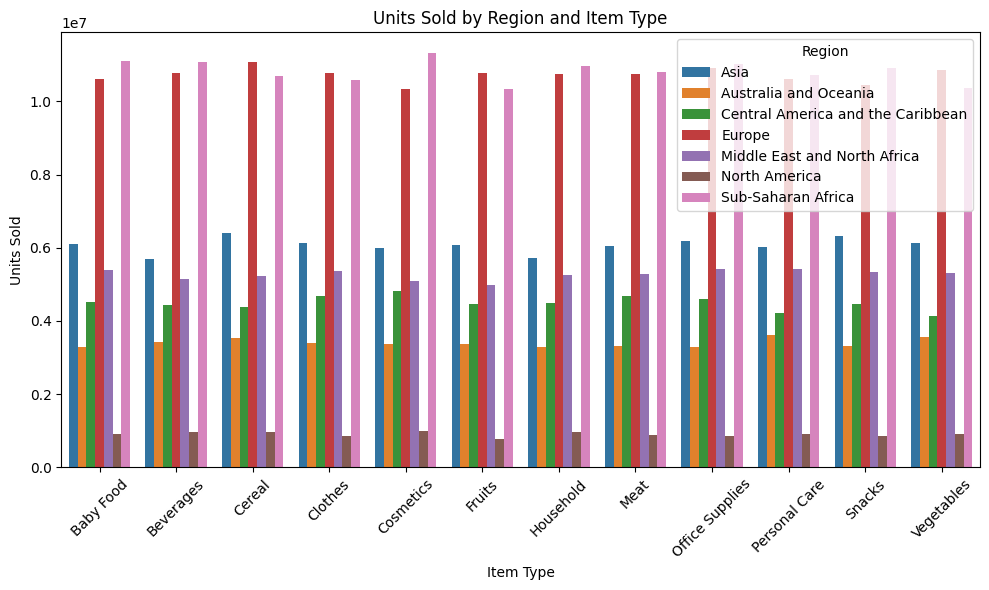

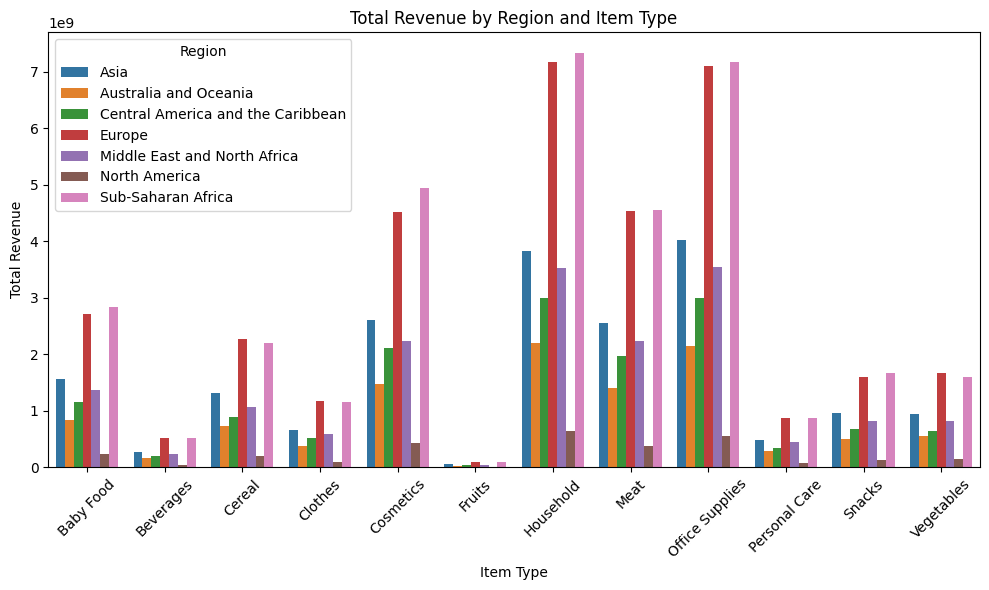

In [28]:
priority_metrics = data.groupby(['Region', 'Item Type']).agg({
        'Units Sold': 'sum',
        'Total Revenue': 'sum',
        'Total Profit': 'sum',
    }).reset_index()

df = priority_metrics
# Visualize the units sold based on region and item type
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Units Sold', hue='Region', data=df)
plt.title('Units Sold by Region and Item Type')
plt.xlabel('Item Type')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

# Visualize the units sold based on region and item type
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Total Revenue', hue='Region', data=df)
plt.title('Total Revenue by Region and Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

# 3. Sales Channel

<ipython-input-29-bc85c33e2b9b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_channel_revenue.values, y=sales_channel_revenue.index, palette='viridis')
<ipython-input-29-bc85c33e2b9b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_channel_profit.values, y=sales_channel_profit.index, palette='viridis')


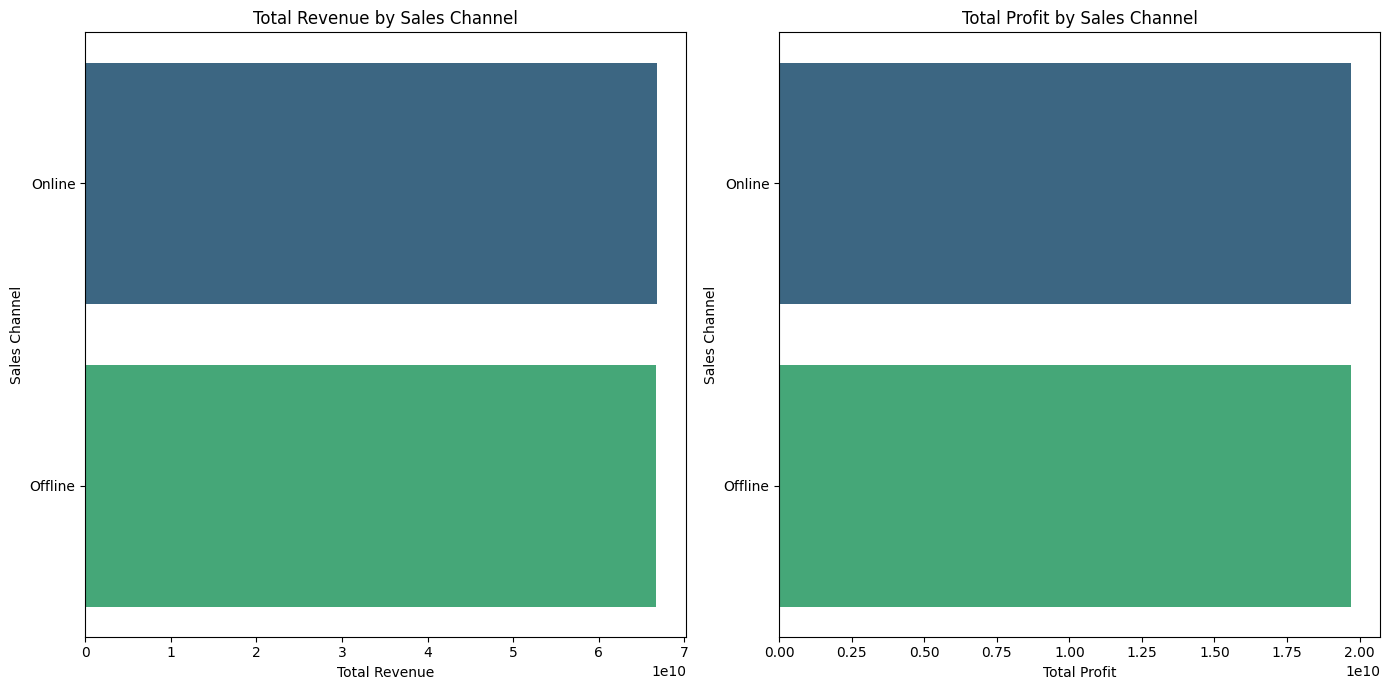

In [29]:
sales_channel_revenue = data.groupby('Sales Channel')['Total Revenue'].sum().sort_values(ascending=False)
sales_channel_profit = data.groupby('Sales Channel')['Total Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=sales_channel_revenue.values, y=sales_channel_revenue.index, palette='viridis')
plt.title('Total Revenue by Sales Channel')
plt.xlabel('Total Revenue')

plt.subplot(1, 2, 2)
sns.barplot(x=sales_channel_profit.values, y=sales_channel_profit.index, palette='viridis')
plt.title('Total Profit by Sales Channel')
plt.xlabel('Total Profit')

plt.tight_layout()
plt.show()


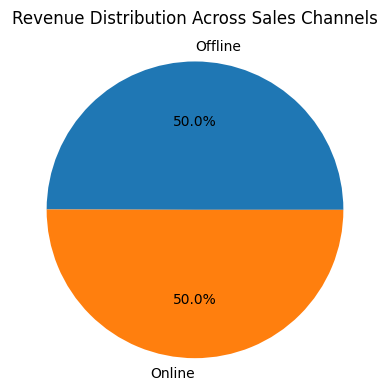

In [31]:
df = data
# Group the data by sales channel and calculate the total revenue for each sales channel
revenue_by_sales_channel = df.groupby('Sales Channel')['Total Revenue'].sum().reset_index()

# Create a pie chart of the revenue distribution
plt.figure(figsize=(4, 4))
plt.title('Revenue Distribution Across Sales Channels', y=1.05)
plt.pie(revenue_by_sales_channel['Total Revenue'], labels=revenue_by_sales_channel['Sales Channel'], autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.axis('equal')
plt.tight_layout()
plt.show()

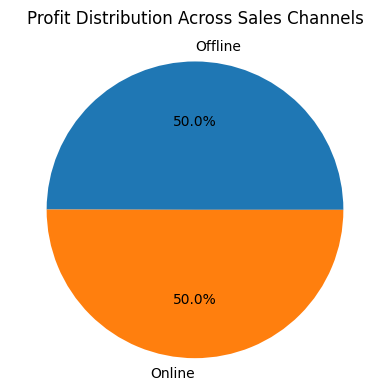

In [32]:
# Group the data by sales channel and calculate the total profit for each sales channel
profit_by_sales_channel = df.groupby('Sales Channel')['Total Profit'].sum().reset_index()

# Create a pie chart of the profit distribution
plt.figure(figsize=(4, 4))
plt.title('Profit Distribution Across Sales Channels', y=1.05)
plt.pie(profit_by_sales_channel['Total Profit'], labels=profit_by_sales_channel['Sales Channel'], autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.axis('equal')
plt.tight_layout()
plt.show()

# 4. Order Priority

<ipython-input-33-8ccbd7ee7952>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_priority_revenue.values, y=order_priority_revenue.index, palette='viridis')
<ipython-input-33-8ccbd7ee7952>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_priority_profit.values, y=order_priority_profit.index, palette='viridis')


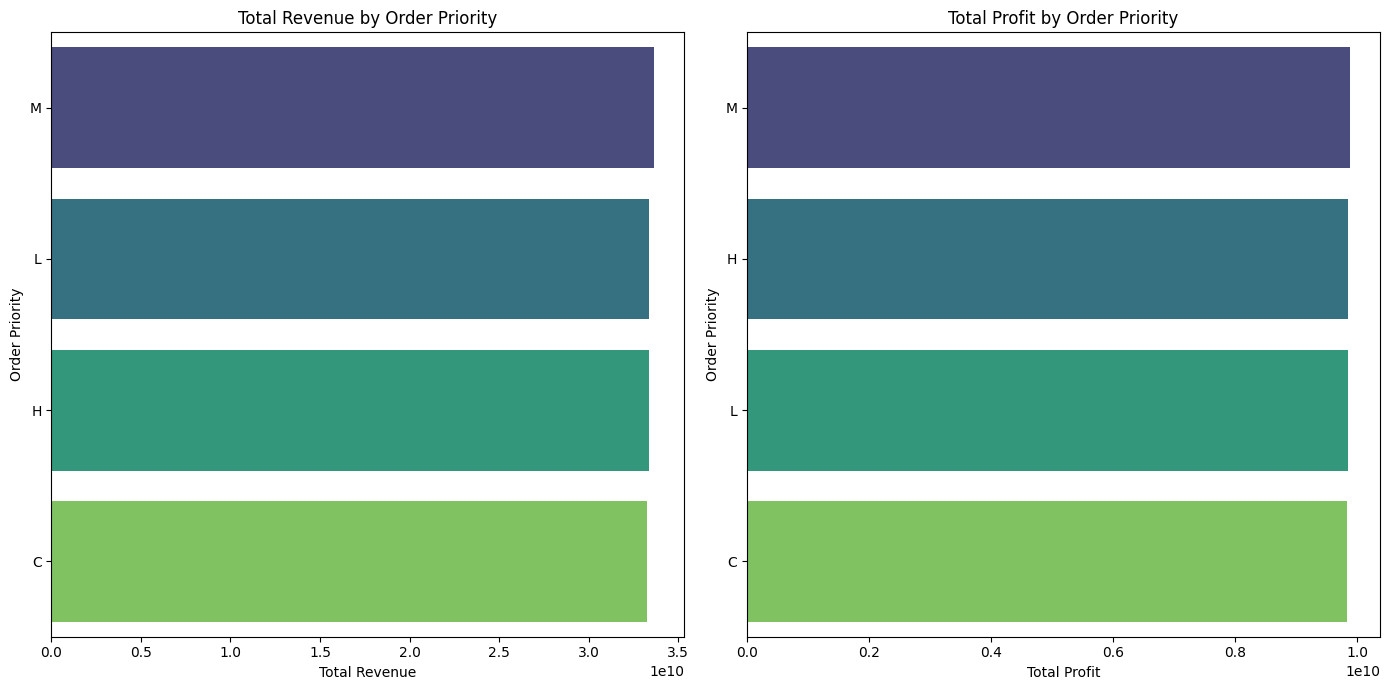

In [33]:
order_priority_revenue = data.groupby('Order Priority')['Total Revenue'].sum().sort_values(ascending=False)

order_priority_profit = data.groupby('Order Priority')['Total Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=order_priority_revenue.values, y=order_priority_revenue.index, palette='viridis')
plt.title('Total Revenue by Order Priority')
plt.xlabel('Total Revenue')
plt.ylabel('Order Priority')

plt.subplot(1, 2, 2)
sns.barplot(x=order_priority_profit.values, y=order_priority_profit.index, palette='viridis')
plt.title('Total Profit by Order Priority')
plt.xlabel('Total Profit')
plt.ylabel('Order Priority')

plt.tight_layout()
plt.show()

# 5. Sales Channel + other criterias

Sales channel + Order Priority

In [35]:
data['Shipping Time'] = (data['Ship Date'] - data['Order Date']).dt.days

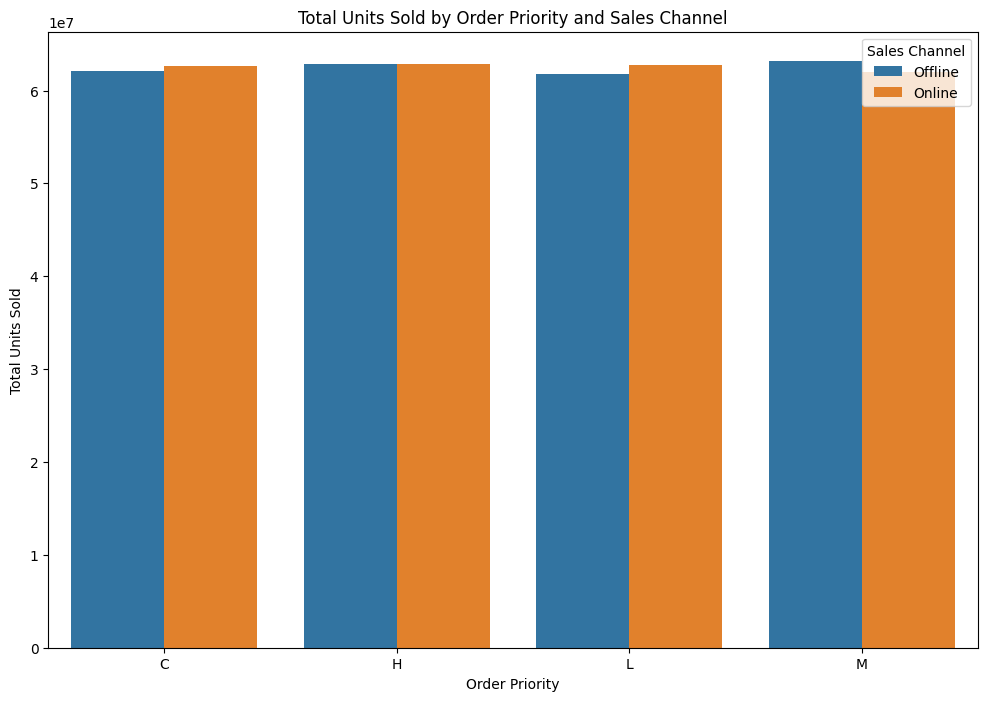

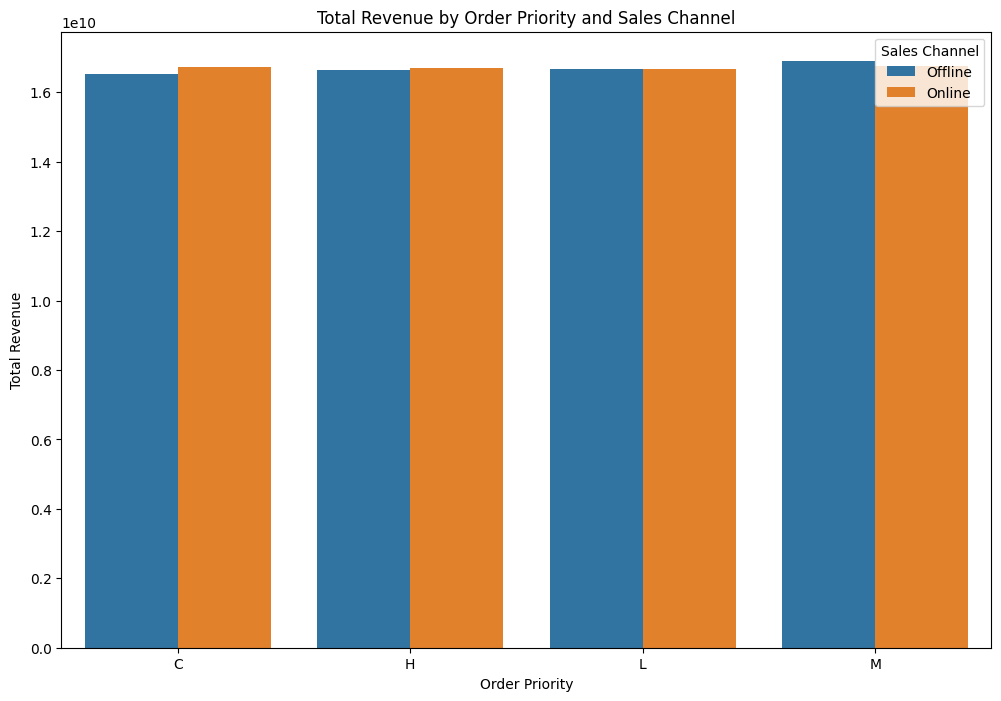

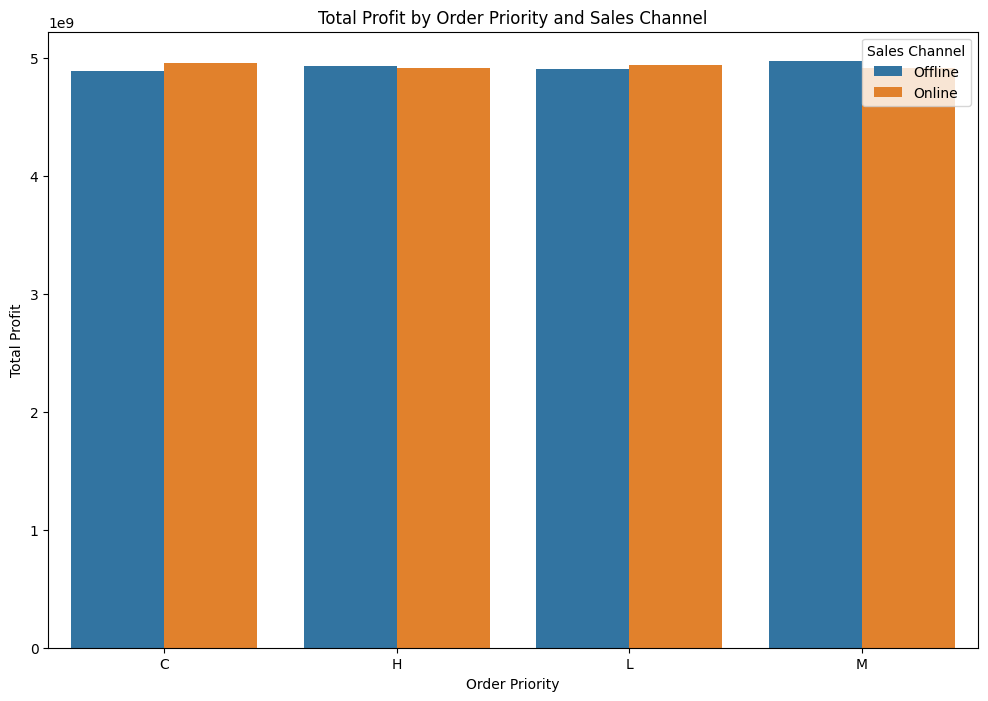

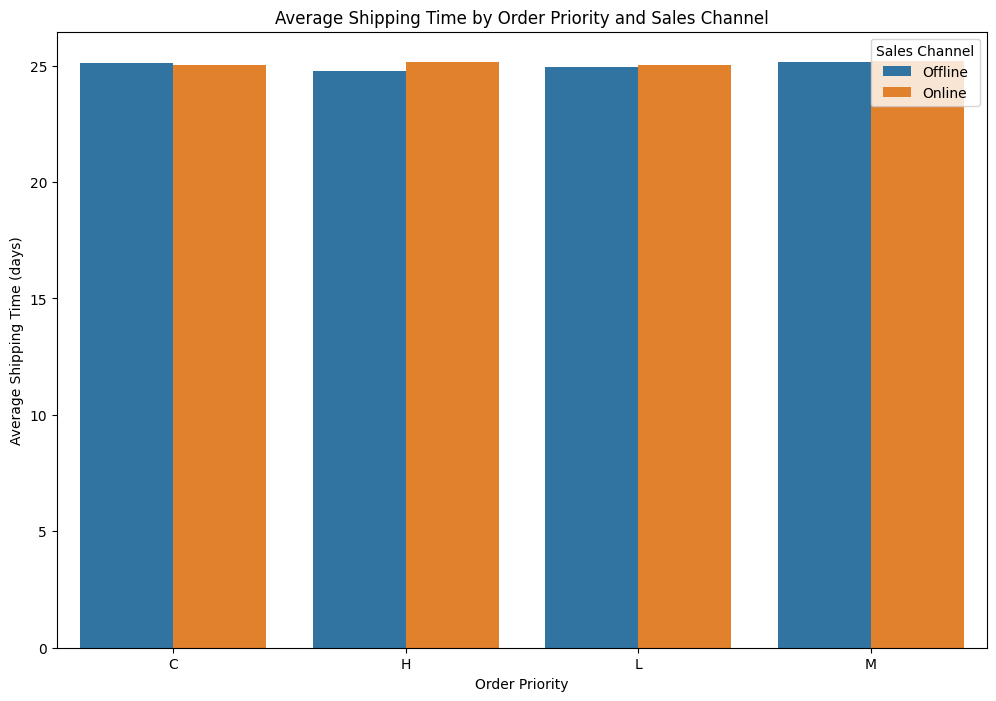

  Sales Channel Order Priority  Units Sold  Total Revenue  Total Profit  \
0       Offline              C    62070435   1.651791e+10  4.883048e+09   
1       Offline              H    62888532   1.665549e+10  4.932194e+09   
2       Offline              L    61741004   1.667574e+10  4.906661e+09   
3       Offline              M    63171201   1.690119e+10  4.970097e+09   
4        Online              C    62606910   1.673645e+10  4.951311e+09   
5        Online              H    62833684   1.669261e+10  4.914985e+09   
6        Online              L    62790722   1.667649e+10  4.938647e+09   
7        Online              M    62042129   1.675080e+10  4.912181e+09   

   Shipping Time  
0      25.102163  
1      24.760164  
2      24.929221  
3      25.139154  
4      25.006736  
5      25.141735  
6      25.010796  
7      25.195812  


In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sales_channel(data):
    # Group by Sales Channel and Order Priority, then calculate relevant metrics
    priority_metrics = data.groupby(['Sales Channel', 'Order Priority']).agg({
        'Units Sold': 'sum',
        'Total Revenue': 'sum',
        'Total Profit': 'sum',
        'Shipping Time': 'mean'
    }).reset_index()

    # Plotting function for Sales Channel and Order Priority metrics
    def plot_metrics(metric, title, ylabel):
        plt.figure(figsize=(12, 8))
        sns.barplot(data=priority_metrics, x='Order Priority', y=metric, hue='Sales Channel')
        plt.title(title)
        plt.xlabel('Order Priority')
        plt.ylabel(ylabel)
        plt.legend(title='Sales Channel')
        plt.show()

    # Plot the total units sold by order priority and sales channel
    plot_metrics('Units Sold', 'Total Units Sold by Order Priority and Sales Channel', 'Total Units Sold')

    # Plot the total revenue by order priority and sales channel
    plot_metrics('Total Revenue', 'Total Revenue by Order Priority and Sales Channel', 'Total Revenue')

    # Plot the total profit by order priority and sales channel
    plot_metrics('Total Profit', 'Total Profit by Order Priority and Sales Channel', 'Total Profit')

    # Plot the average shipping time by order priority and sales channel
    plot_metrics('Shipping Time', 'Average Shipping Time by Order Priority and Sales Channel', 'Average Shipping Time (days)')

    # Performance comparison summary
    print(priority_metrics)
plot_sales_channel(data)

Sales Channel + Item Type

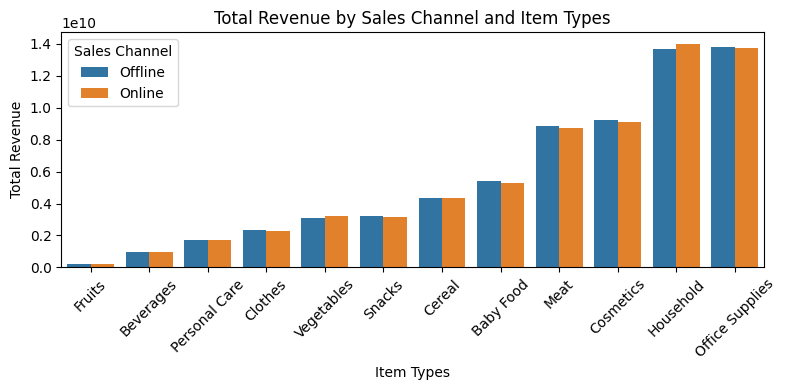

In [37]:
# Assuming your dataset is named 'df'
total_revenue_item = df.groupby(['Item Type', 'Sales Channel'])['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in ascending order
total_revenue_item = total_revenue_item.sort_values(by='Total Revenue')

# Visualize the units sold based on region and item type
plt.figure(figsize=(8, 4))
sns.barplot(x='Item Type', y='Total Revenue', hue='Sales Channel', data=total_revenue_item)
plt.title('Total Revenue by Sales Channel and Item Types')
plt.xlabel('Item Types')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Sales Channel + Region

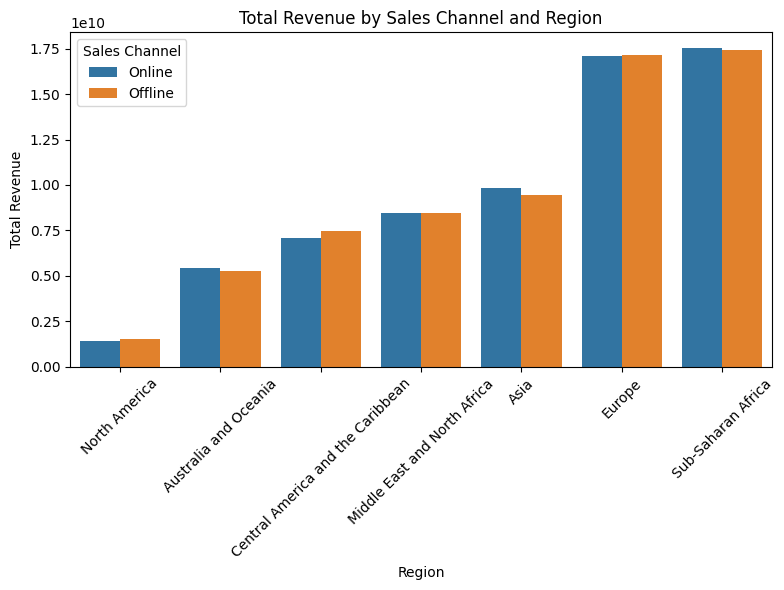

In [38]:
# Assuming your dataset is named 'df'
total_revenue_region = df.groupby(['Region', 'Sales Channel'])['Total Revenue'].sum().reset_index()

# Sort the data by total revenue in ascending order
total_revenue_region = total_revenue_region.sort_values(by='Total Revenue')

# Visualize the units sold based on region and item type
plt.figure(figsize=(8, 6))
sns.barplot(x='Region', y='Total Revenue', hue='Sales Channel', data=total_revenue_region)
plt.title('Total Revenue by Sales Channel and Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Sales Channel + Region + Item Type

In online channel

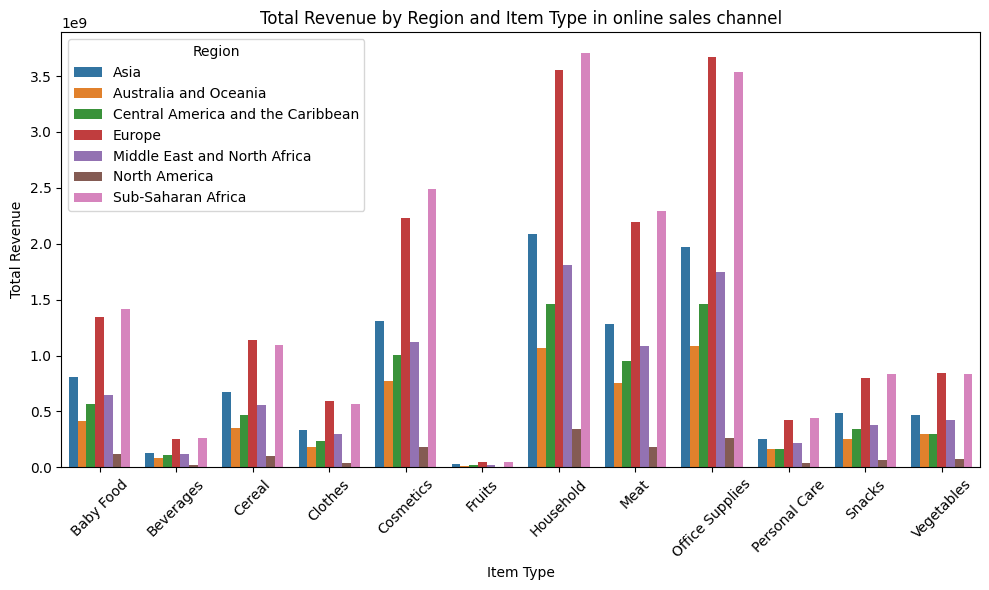

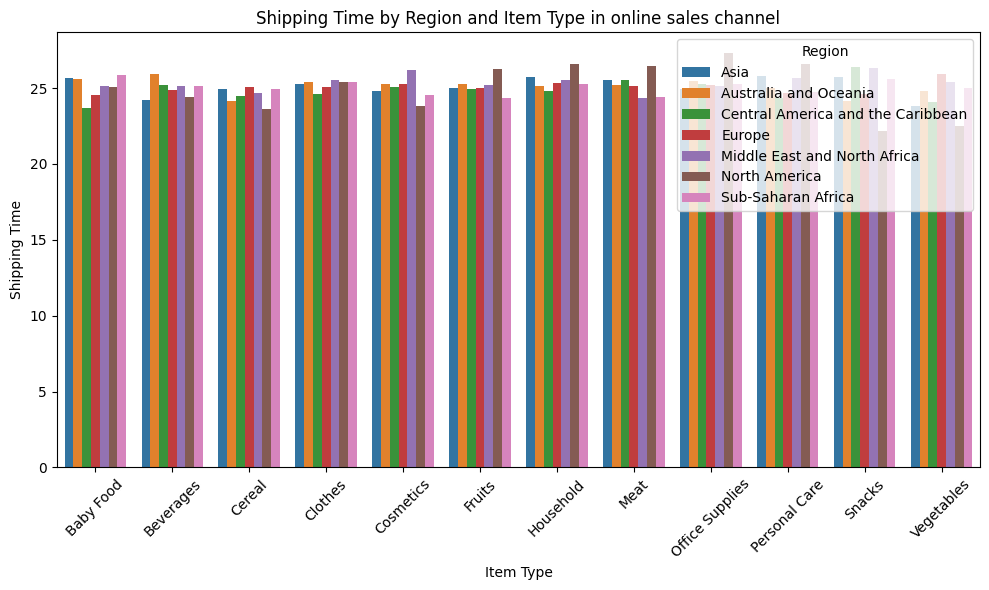

In [39]:
#sales channel and item type
sales_metrics = data.groupby(['Region', 'Item Type', 'Sales Channel']).agg({
        'Units Sold': 'sum',
        'Total Revenue': 'sum',
        'Total Profit': 'sum',
        'Shipping Time': 'mean'
    }).reset_index()
online_channel = sales_metrics[sales_metrics['Sales Channel'] == 'Online']
offline_channel = sales_metrics[sales_metrics['Sales Channel'] == 'Offline']
df = online_channel
# Visualize the units sold based on region and item type
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Total Revenue', hue='Region', data=df)
plt.title('Total Revenue by Region and Item Type in online sales channel')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

# Visualize the units sold based on region and item type
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Shipping Time', hue='Region', data=df)
plt.title('Shipping Time by Region and Item Type in online sales channel')
plt.xlabel('Item Type')
plt.ylabel('Shipping Time')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

IN offline Channel

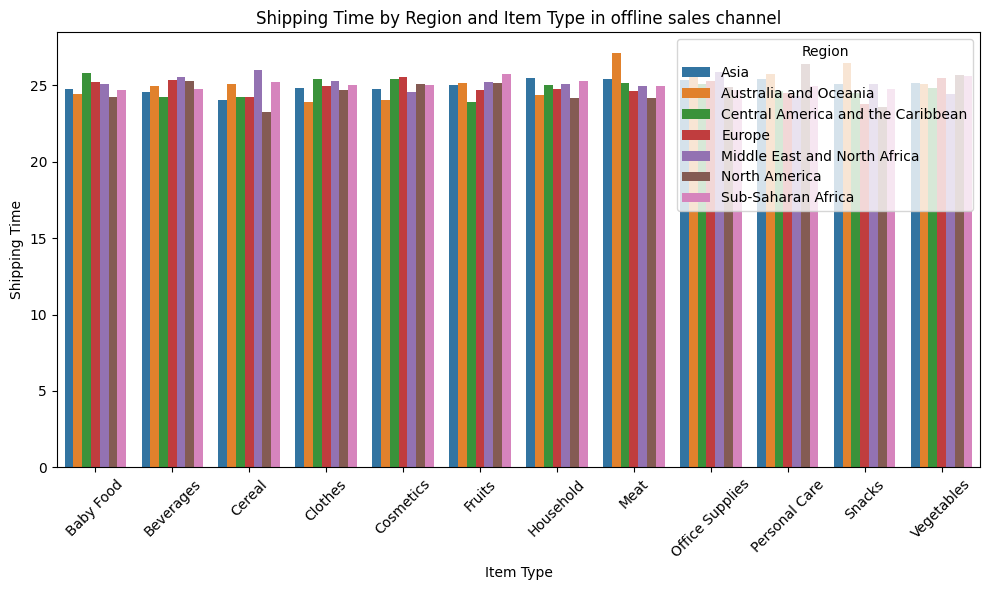

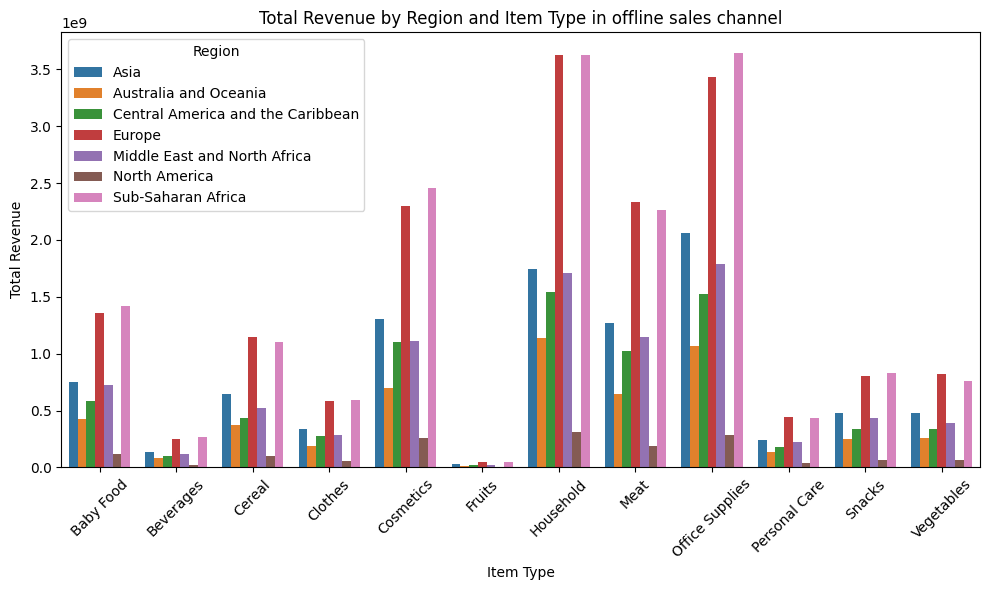

In [40]:
df = offline_channel
# Visualize the units sold based on region and item type
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Shipping Time', hue='Region', data=df)
plt.title('Shipping Time by Region and Item Type in offline sales channel')
plt.xlabel('Item Type')
plt.ylabel('Shipping Time')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

# Visualize the units sold based on region and item type
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', y='Total Revenue', hue='Region', data=df)
plt.title('Total Revenue by Region and Item Type in offline sales channel')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()

# Show the plot
plt.show()

# 5. Order Date & Ship Date

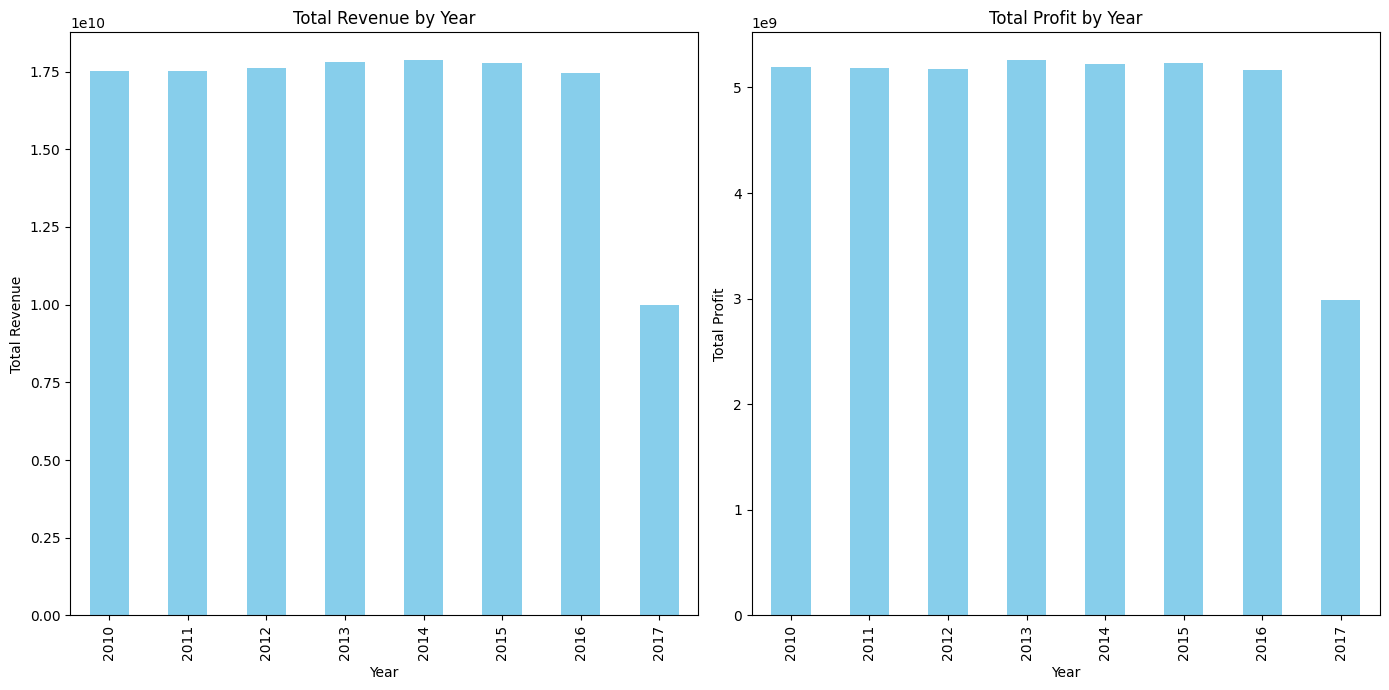

In [41]:
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
yearly_revenue = data.groupby('Order Year')['Total Revenue'].sum()
yearly_profit = data.groupby('Order Year')['Total Profit'].sum()
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
yearly_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Total Revenue')

plt.subplot(1, 2, 2)
yearly_profit.plot(kind='bar', color='skyblue')
plt.title('Total Profit by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

# Checking how the price changes monthly in each country

In [42]:
check = data.groupby(by = ['Country', 'Order Month', 'Order Year'])['Total Revenue'].sum().reset_index()

In [43]:
#function plot monthly change in each country in one year
def plot_monthly_change_country(data, country, year):
    check = data.loc[data['Order Year'] == year]
    df = check.loc[check['Country'] == country]
    df['Monthly Change'] = df['Total Revenue'].diff()

    # Plotting the data
    plt.figure(figsize=(10, 6))
    plt.plot(df['Order Month'], df['Total Revenue'], marker='o', label='Total Revenue')
    plt.plot(df['Order Month'], df['Monthly Change'], marker='o', linestyle='--', label='Monthly Change')
    plt.xlabel('Month')
    plt.ylabel('Revenue')
    plt.title('Monthly Total Revenue and Change in Revenue')
    plt.legend()
    plt.grid(True)
    plt.show()

<ipython-input-43-8bfcdb286d2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monthly Change'] = df['Total Revenue'].diff()


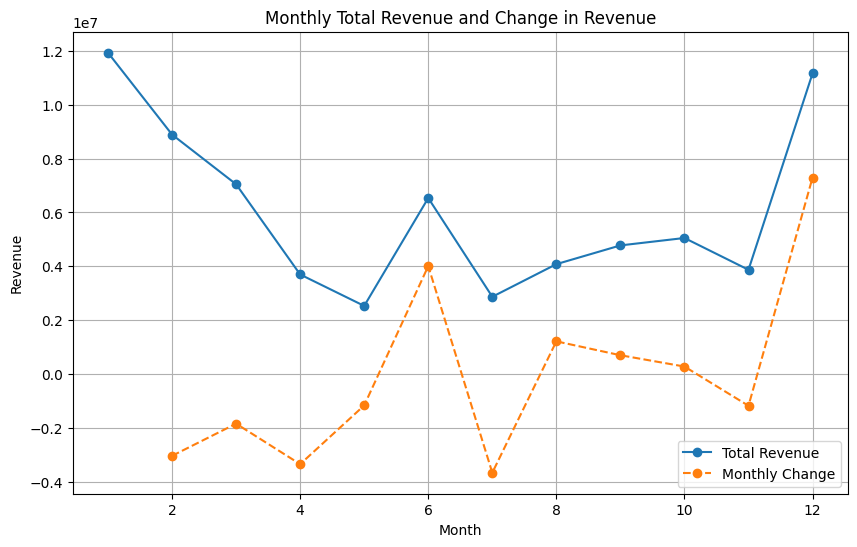

In [44]:
plot_monthly_change_country(check, 'Afghanistan', 2010)

<ipython-input-43-8bfcdb286d2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monthly Change'] = df['Total Revenue'].diff()


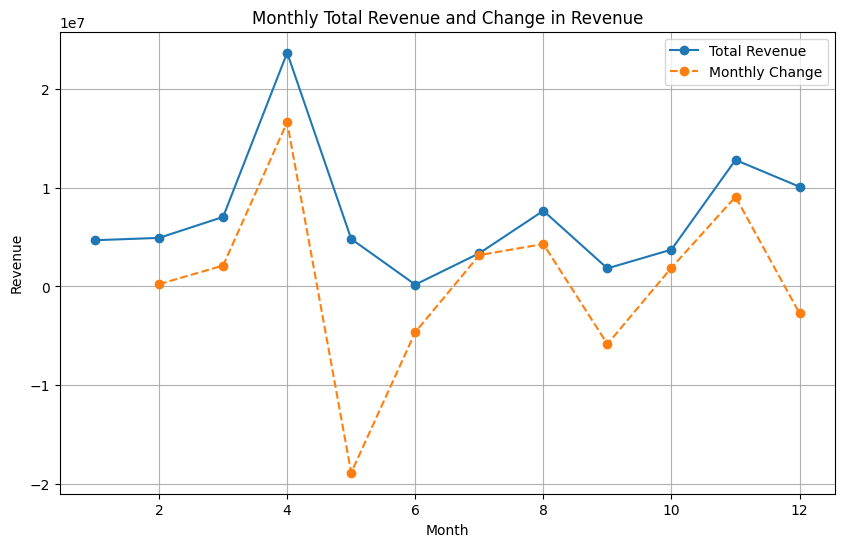

In [45]:
plot_monthly_change_country(check, 'Afghanistan', 2011)

<ipython-input-43-8bfcdb286d2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monthly Change'] = df['Total Revenue'].diff()


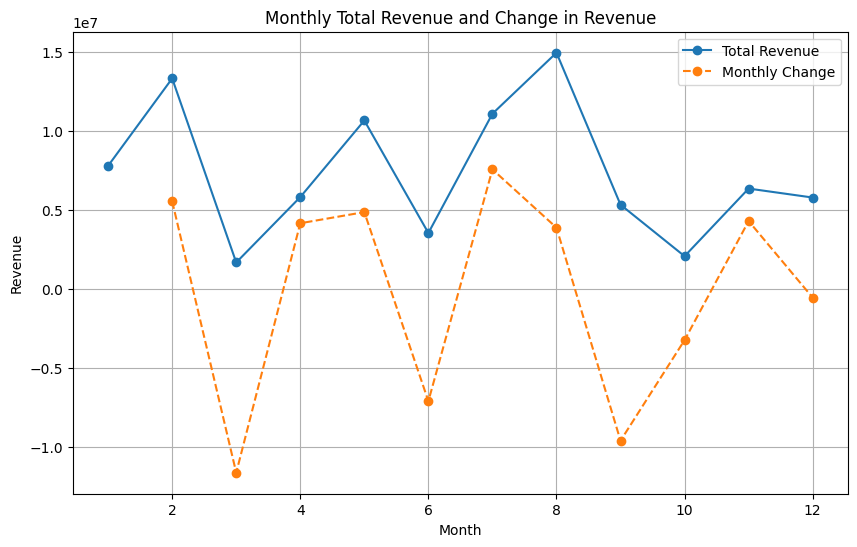

In [46]:
plot_monthly_change_country(check, 'China', 2011)

<ipython-input-43-8bfcdb286d2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monthly Change'] = df['Total Revenue'].diff()


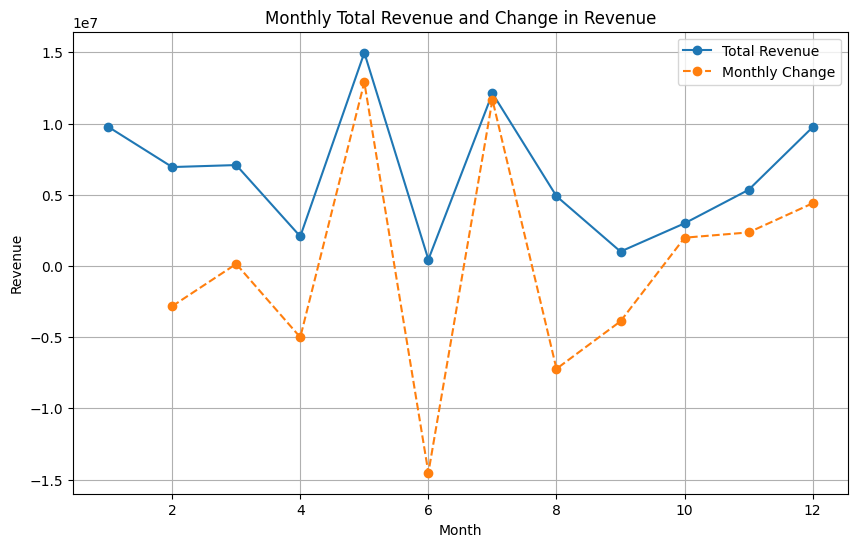

In [47]:
plot_monthly_change_country(check, 'Germany', 2011)

<ipython-input-43-8bfcdb286d2b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Monthly Change'] = df['Total Revenue'].diff()


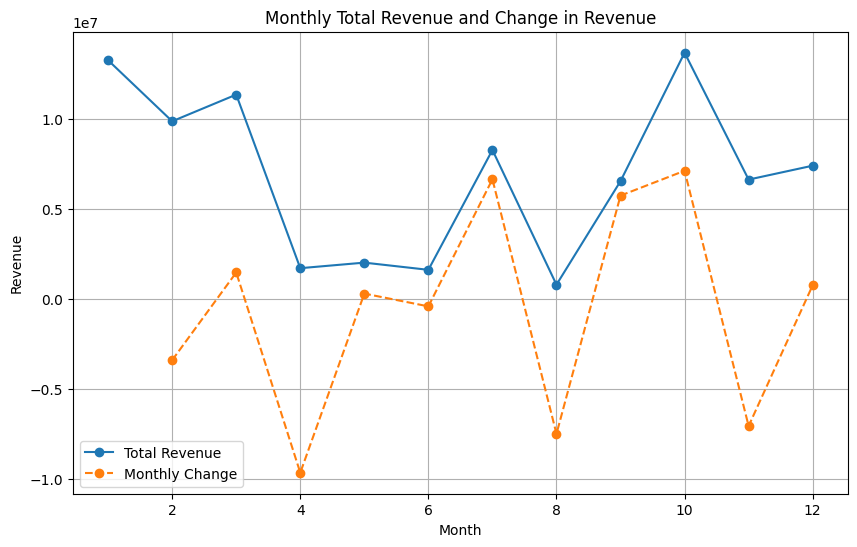

In [48]:
plot_monthly_change_country(check, 'France', 2012)

# Checking Correlation

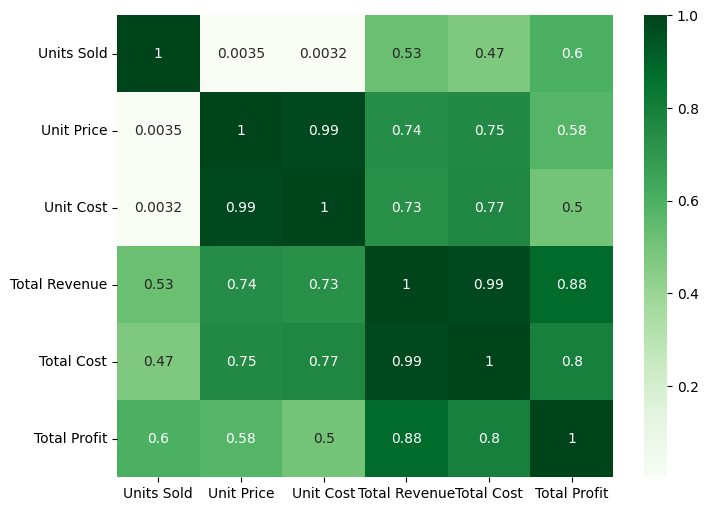

In [49]:
# Tính toán ma trận tương quan
df = data
corr_matrix = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()

# Vẽ biểu đồ tương quan
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'Greens')
plt.show()

#Checking Stationary


In [50]:
df_time_series = data[['Order Date', 'Total Revenue']]
df_time_series = df_time_series.sort_values(by = 'Order Date')
df_time_series = df_time_series.groupby(by = 'Order Date')['Total Revenue'].sum().reset_index()
df_time_series = df_time_series.set_index('Order Date')
df_time_series

,Total Revenue
Order Date,
2010-01-01,47119220.30
2010-01-02,38397582.10
2010-01-03,65138561.36
2010-01-04,70553636.16
2010-01-05,48762396.14
...,...
2017-07-24,53949237.29
2017-07-25,43917353.04
2017-07-26,58720600.44


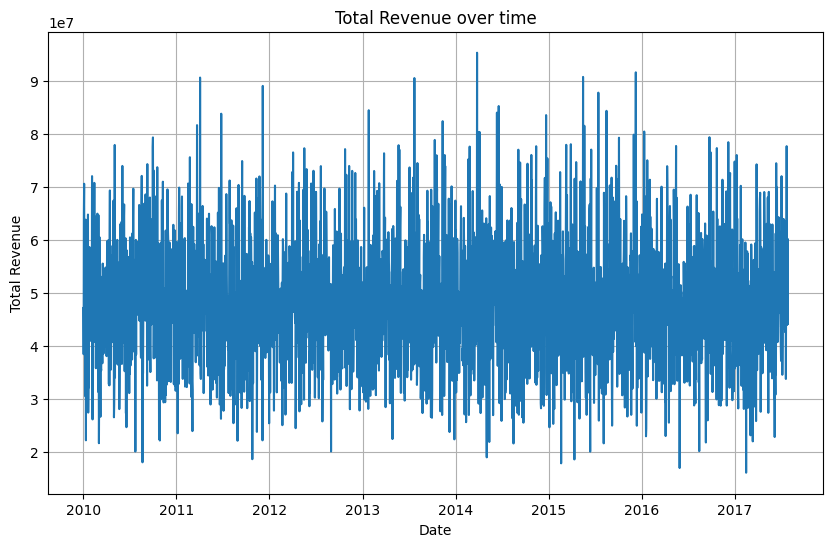

In [51]:
#plot close price in train data
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.plot(df_time_series['Total Revenue'])
plt.title('Total Revenue over time')
plt.show()

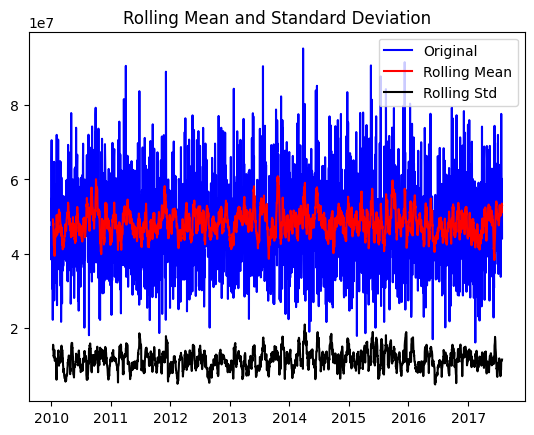

Results of dickey fuller test
Test Statistics                 -22.024469
p-value                           0.000000
No. of lags used                  5.000000
Number of observations used    2760.000000
critical value (1%)              -3.432722
critical value (5%)              -2.862588
critical value (10%)             -2.567328
dtype: float64


In [52]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(df_time_series)

Test Statistic vs. Critical Values: The test statistic (-22.024469) is much lower than the critical values at all levels (1%, 5%, and 10%). This means that the test statistic falls in the region where we reject the null hypothesis of a unit root.
p-value: A p-value of 0.000000 indicates strong evidence against the null hypothesis of a unit root.

Conclusion:
Since the test statistic is significantly lower than the critical values and the p-value is extremely low, we reject the null hypothesis. This means that the time series is stationary.

Therefore, based on the results of the Dickey-Fuller test, the time series is stationary.

#Plot the map (counting the order)

In [53]:
country_counts = data.groupby('Country').size().reset_index(name='Country_Count')

In [54]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import plot

# Create the choropleth
df= country_counts
data2 = dict(
    type='choropleth',
    locations=df['Country'],
    locationmode='country names',
    z=df['Country_Count'],
    text=df['Country'],
    colorbar={'title': 'Order nb.'},
    colorscale=[
        [0, 'rgb(224,255,255)'],
        [0.01, 'rgb(166,206,227)'],
        [0.02, 'rgb(31,120,180)'],
        [0.03, 'rgb(178,223,138)'],
        [0.05, 'rgb(51,160,44)'],
        [0.10, 'rgb(251,154,153)'],
        [0.20, 'rgb(255,255,0)'],
        [1, 'rgb(227,26,28)']
    ],
    reversescale=False
)

layout = dict(
    title='Number of orders per country',
    geo=dict(
        showframe=True,
        projection={'type': 'mercator'}
    )
)

choromap = go.Figure(data=[data2], layout=layout)

# Use plotly.offline.plot() to display the plot in a browser
plot(choromap, validate=False)


'temp-plot.html'

# Checking relationship between Total Revenue and Sales Channel

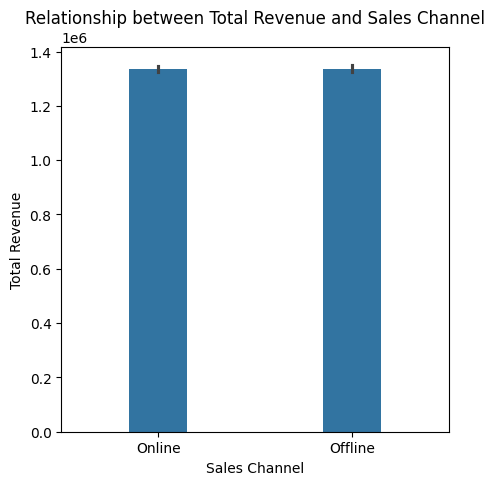

In [56]:
df = data
# Vẽ biểu đồ cột
plt.figure(figsize=(5, 5))
sns.barplot(x='Sales Channel', y='Total Revenue', data=df, width=0.3)
plt.xlabel('Sales Channel')
plt.ylabel('Total Revenue')
plt.title('Relationship between Total Revenue and Sales Channel')
plt.show()